In [1]:
using LilGuys
using CairoMakie, Arya

In [2]:
using Printf

In [3]:
import DataFrames: DataFrame, rename!

In [4]:
using OrderedCollections

In [5]:
using PyFITS

In [6]:
import TOML

In [7]:
CairoMakie.activate!(type=:png, px_per_unit=2)

In [8]:
models_dir = "."

"."

In [9]:
sims_dir = "/astro/dboyea/dwarfs/simulations/sculptor"

"/astro/dboyea/dwarfs/simulations/sculptor"

In [10]:
function get_idx_f(name)
    return TOML.parsefile(joinpath(models_dir, "$name/orbital_properties.toml"))["idx_f"]
end

get_idx_f (generic function with 1 method)

In [11]:
function load_scalars(name) 
    path = joinpath(models_dir, "$name/profiles_scalars.fits")

    return read_fits(path)[1:get_idx_f(name), :]
end

load_scalars (generic function with 1 method)

In [12]:
function load_profiles(name) 
    path = joinpath(models_dir, "$name/profiles.hdf5")

    profs = LilGuys.read_ordered_structs(path, LilGuys.MassProfile)

    prof_i = profs[begin].second
    prof_f = profs[get_idx_f(name)].second
    return prof_i, prof_f
end

load_profiles (generic function with 1 method)

# Plotting functions

In [13]:
log_r_label = "log r / kpc"
log_rho_label = L"\log \rho"

L"$\log \rho$"

In [14]:
function compare_vcirc(profiles; errskip=1, legend=true, relative = false)
    xlims = (-2, 3)
    
    fig = Figure(size=(5*72, 3.5*72))
    ax = Axis(fig[1, 1],
        xlabel=log_r_label,
        ylabel=L"$\log\,v_\textrm{circ}$ / km\,s$^{-1}$",
#        limits=(xlims[1], xlims[2], -0.1, 1.7),
        )
    pi = 1

    
    for i in eachindex(profiles)
        label, prof = profiles[i]
        x = prof.r_circ_max
        y = prof.v_circ_max * V2KMS

        if relative 
            x ./= x[1]
            y ./= y[1]
        end
        lines!(log10.(x), log10.(y), label=label)
    end
    
    for i in eachindex(profiles)
        label, prof = profiles[i]
        x = prof.r_circ_max
        y = prof.v_circ_max * V2KMS

        if relative 
            x ./= x[1]
            y ./= y[1]
        end
        scatter!(log10.(x[end]), log10.(y[end]))
    end
    if legend
        axislegend(position=:lt)
    end
    fig
end

compare_vcirc (generic function with 1 method)

In [15]:
function compare_vcirc_time(profiles; errskip=1, legend=true)
    xlims = (-2, 3)
    
    fig = Figure()
    ax = Axis(fig[1, 1],
        xlabel="time / Gyr",
        ylabel=L"$\log\,v_\textrm{circ}$ / km\,s$^{-1}$",
#        limits=(xlims[1], xlims[2], -0.1, 1.7),
        )
    pi = 1

    
    for i in eachindex(profiles)
        label, profs = profiles[i]
        x = prof.time * T2GYR
        y = prof.v_circ_max
        lines!((x), log10.(y*V2KMS), label=label)
    end
    
    if legend
        axislegend(position=:lt)
    end
    fig
end

compare_vcirc_time (generic function with 1 method)

In [16]:
function compare_boundmass_time(profiles; errskip=1, legend=true)
    xlims = (-2, 3)
    
    fig = Figure()
    ax = Axis(fig[1, 1],
        xlabel="time / Gyr",
        ylabel="log bound mass",
#        limits=(xlims[1], xlims[2], -0.1, 1.7),
        )
    pi = 1

    
    for i in eachindex(profiles)
        label, prof = profiles[i]
        x = prof.time * T2GYR
        y = prof.bound_mass
        lines!((x), log10.(y), label=label)
    end
    
    if legend
        axislegend(position=:lt)
    end
    fig
end

compare_boundmass_time (generic function with 1 method)

## Halo Type

In [17]:
profiles = [
    "compact" => load_scalars("1e6_new_v31_r3.2/orbit_smallperi"),
    "heavy" => load_scalars("1e6_new_v43_r7/orbit_smallperi"),
    "light" => load_scalars("1e6_new_v25_r2.5/orbit_smallperi"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened


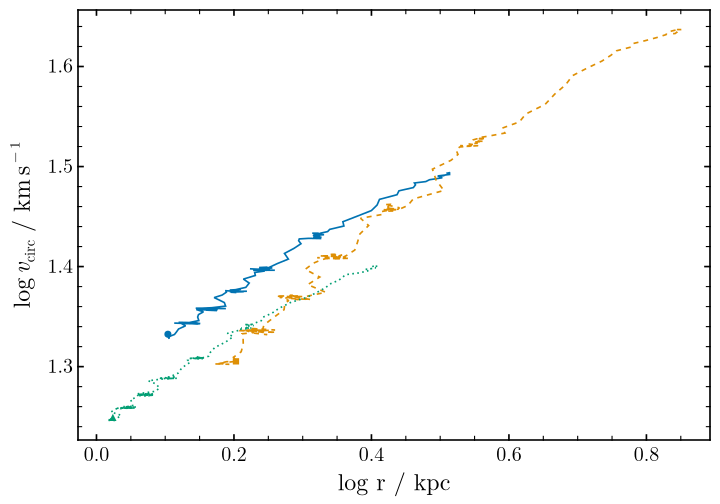

In [18]:
fig = compare_vcirc(profiles, legend=false)

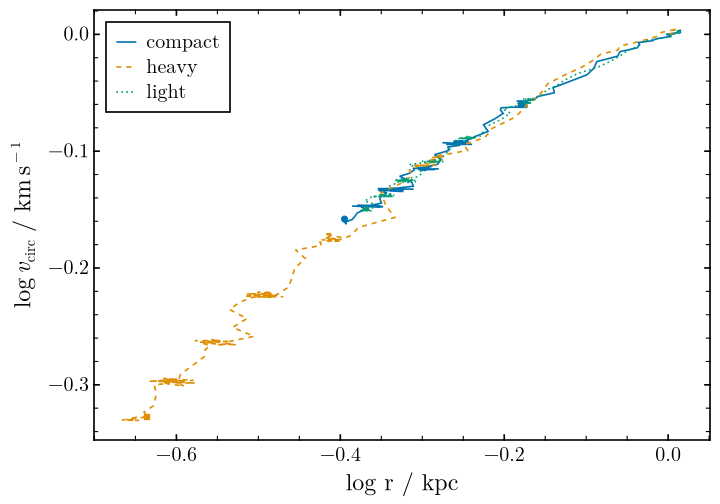

In [19]:
fig = compare_vcirc(profiles, legend=true, relative=true)

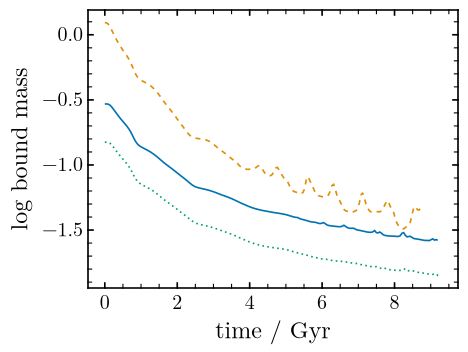

In [20]:
compare_boundmass_time(profiles, legend=false)

# Particle Number

In [21]:
profiles = [
    "1e7" => load_scalars("1e7_new_v31_r3.2/orbit_smallperi"),
    "1e6" => load_scalars("1e6_new_v31_r3.2/orbit_smallperi"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened


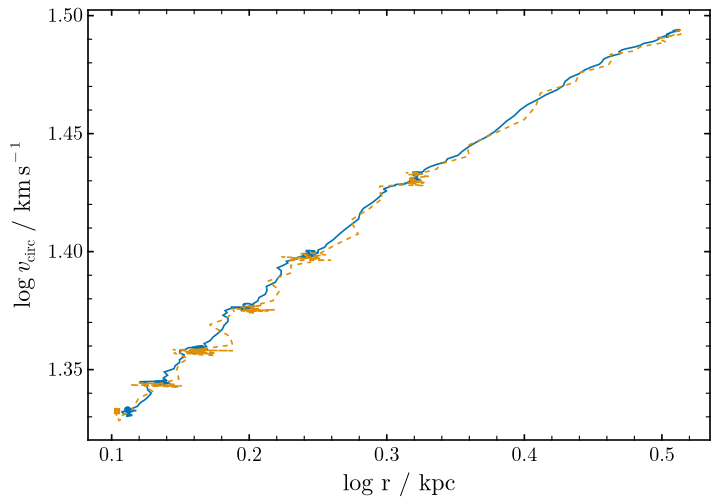

In [22]:
fig = compare_vcirc(profiles, legend=false)

# Orbit

In [40]:
profiles = [
    "smallperi" => load_scalars("1e7_V31_r3.2/orbit_smallperi"),
    "mean" => load_scalars("1e7_V31_r3.2/orbit_mean"),
   "lmc" => load_scalars("1e7_V31_r4.2/vasiliev24_L3M11_2x_smallperilmc"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened


In [52]:
log10(0.3017)

-0.5204246898250116

In [54]:
profiles[3].second.bound_mass ./ 0.3017

416-element Vector{Float64}:
 2.0725455950895664
 2.0724888073402603
 2.0719383392302047
 2.0711615491411655
 2.0693524240912122
 2.067717807380365
 2.0644274339936004
 2.0617260780649613
 2.056646890575075
 2.05252957149587
 2.0452642629122826
 2.0396860064431
 2.0302397581298
 ⋮
 0.6082693341572415
 0.6113791888226735
 0.6133644802482096
 0.6162668730995732
 0.6176969295601848
 0.6202405647690383
 0.6213692731001241
 0.6230977761264289
 0.6243205780275316
 0.6259156091175125
 0.6266982023342185
 0.6274271166200115

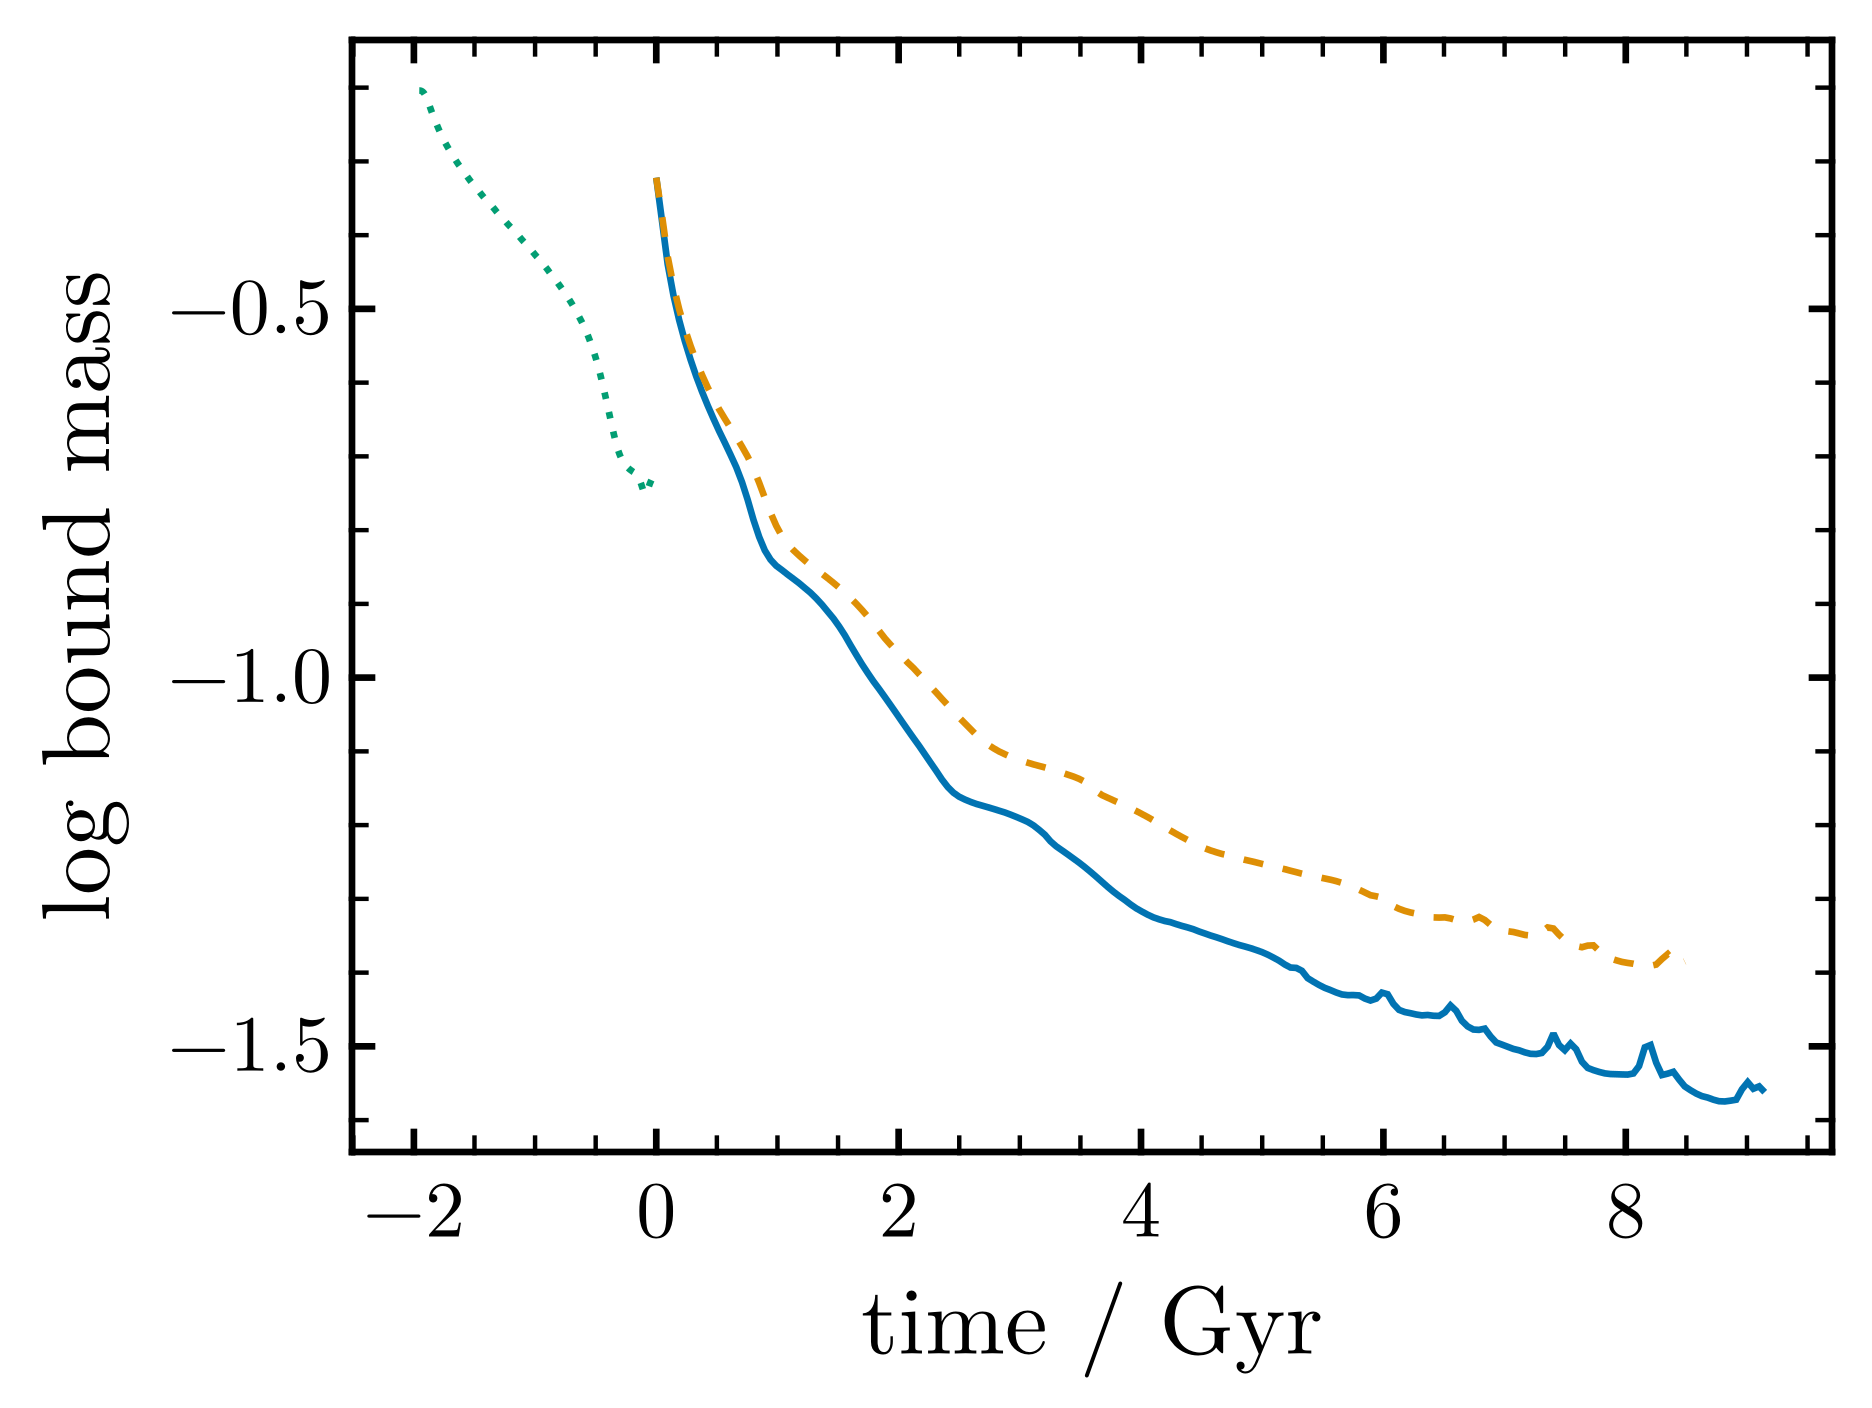

In [42]:
compare_boundmass_time(profiles, legend=false)

In [43]:
prof_i, prof_f = load_profiles("1e7_V31_r3.2/orbit_smallperi");

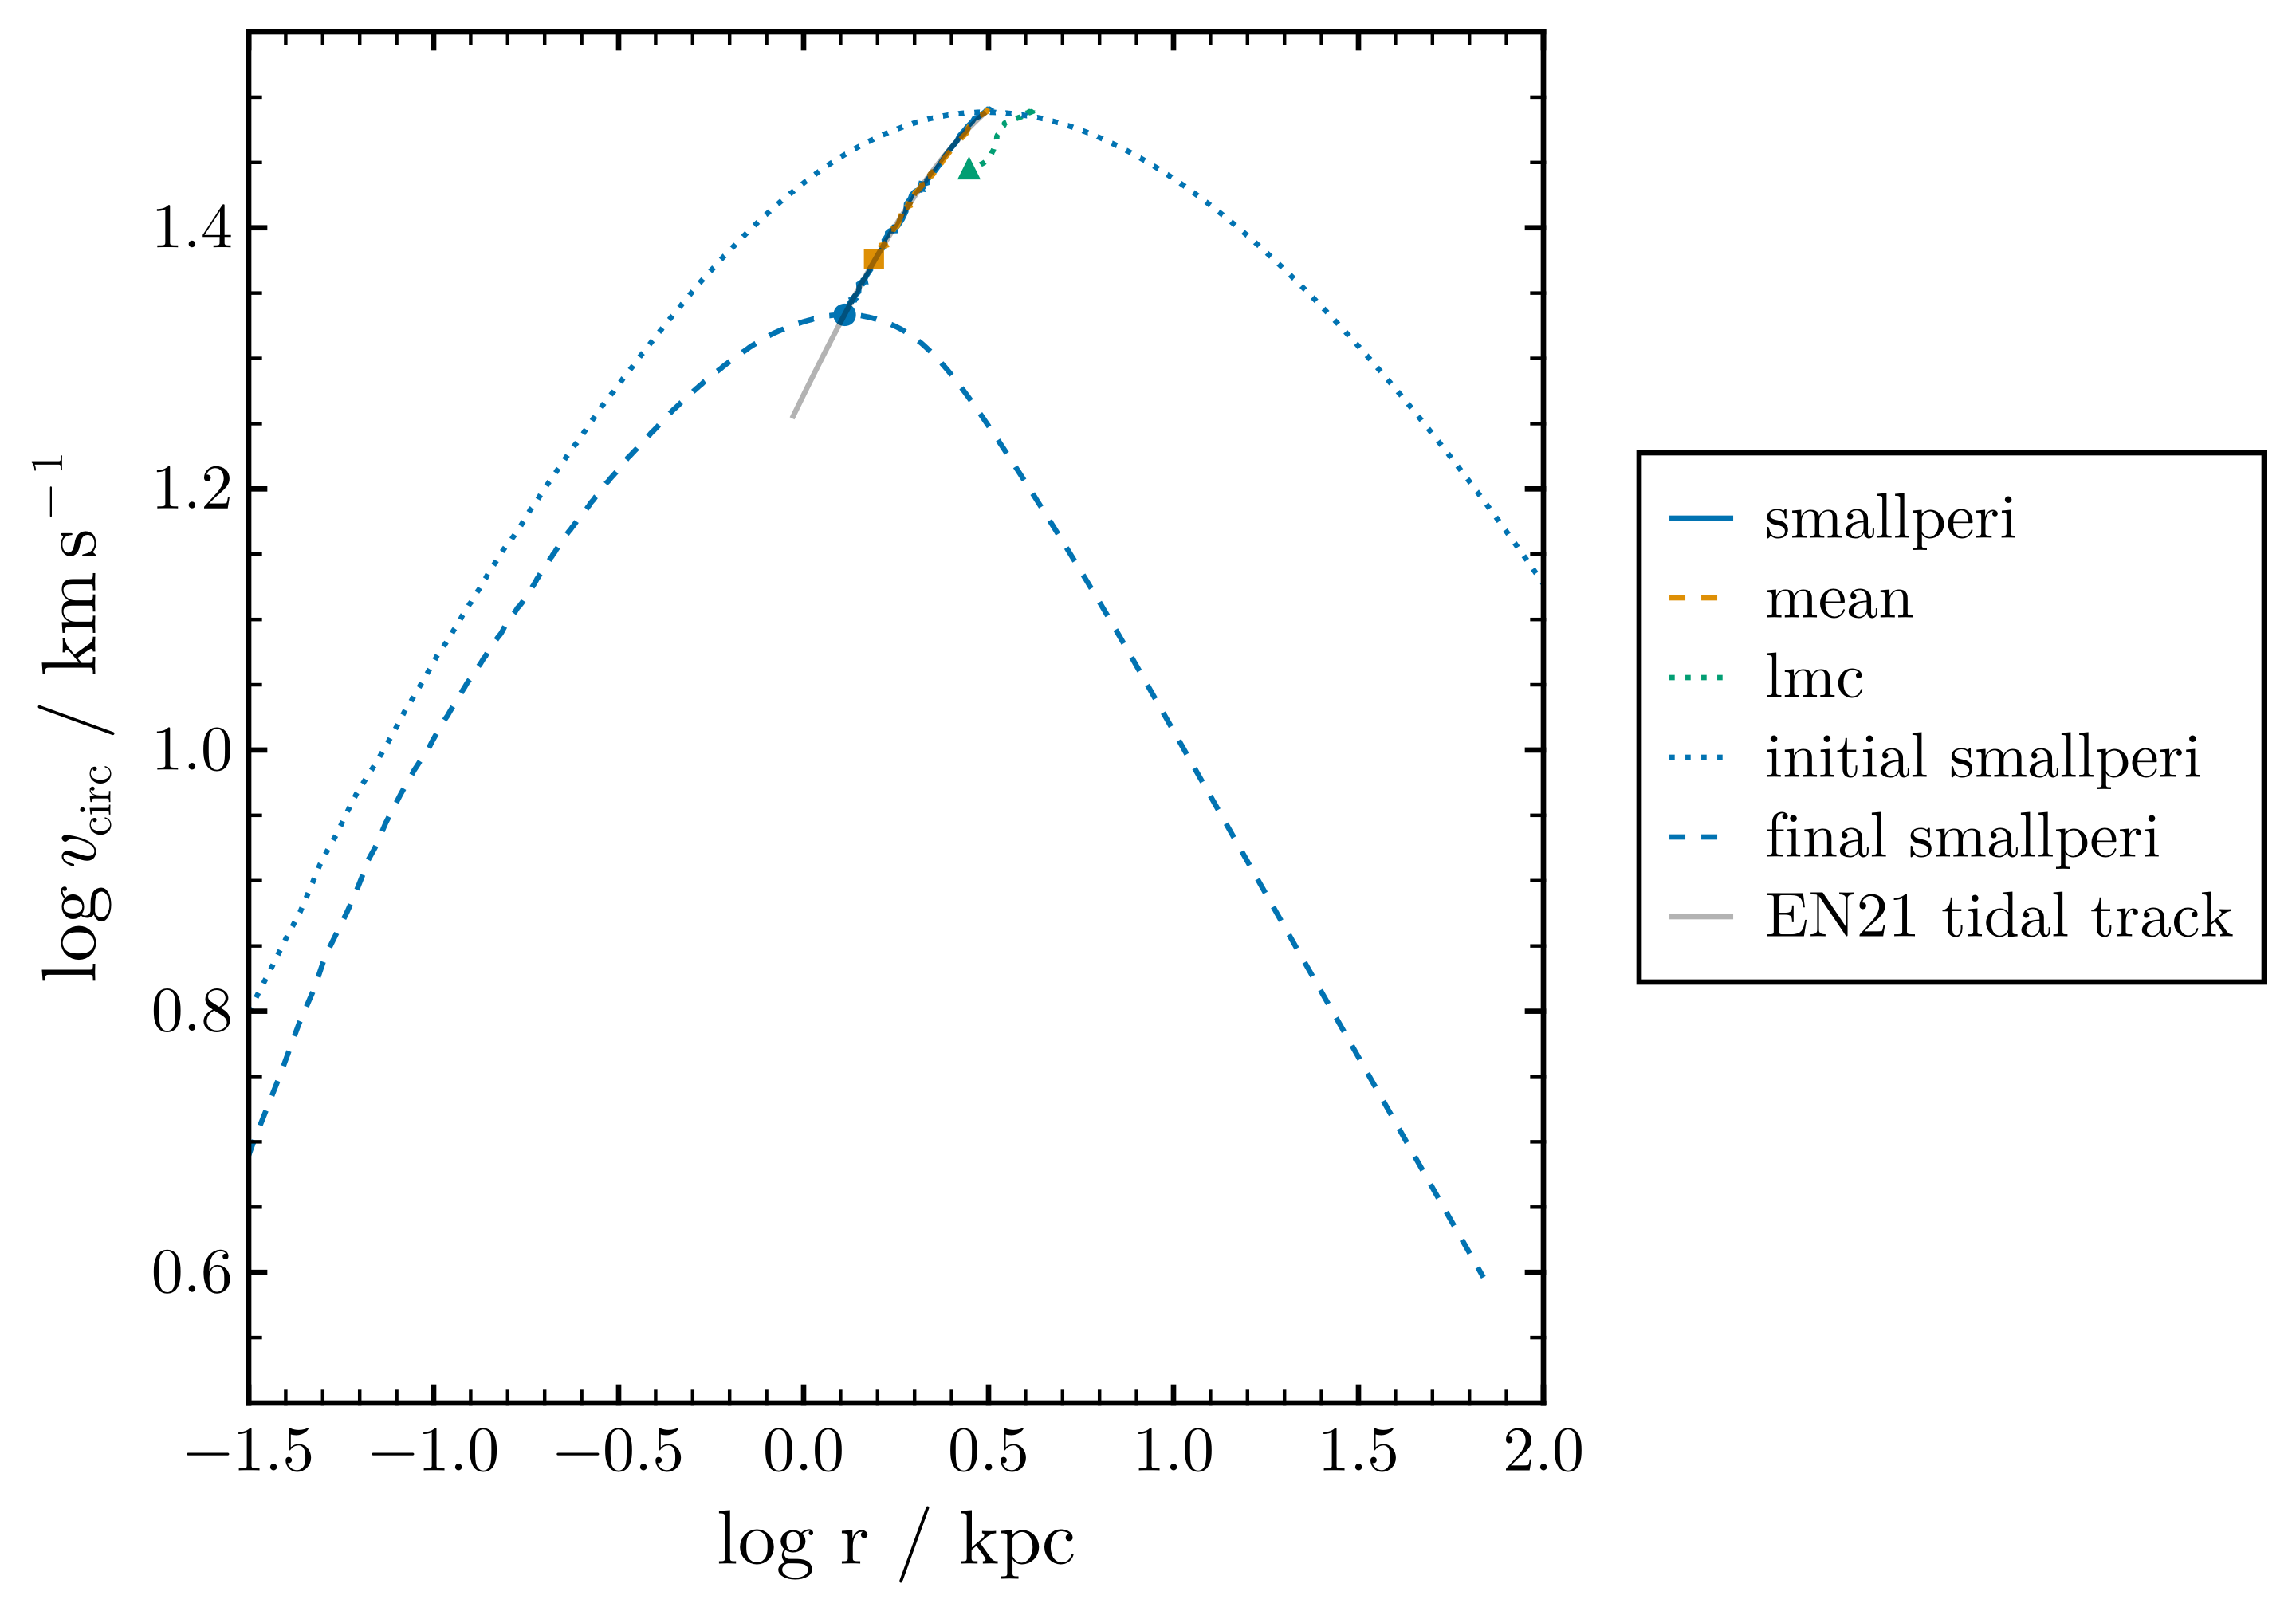

In [51]:
fig = compare_vcirc(profiles, legend=false)


prof = profiles[1].second

r_circ_tidal, v_circ_tidal = LilGuys.EN21_tidal_track(prof.r_circ_max[1], prof.v_circ_max[1], x_min=0.3)


lines!(log10.(prof_i.radii), log10.(LilGuys.circular_velocity(prof_i) * V2KMS), color=COLORS[1], linestyle=:dot, label="initial $(profiles[1].first)")
lines!(log10.(prof_f.radii), log10.(LilGuys.circular_velocity(prof_f) * V2KMS), color=COLORS[1], linestyle=:dash, label="final $(profiles[1].first)")

lines!(log10.(r_circ_tidal), log10.(v_circ_tidal * V2KMS), label = "EN21 tidal track", color=:black, alpha=0.3)


ylims!(0.5, 1.55)
xlims!(-1.5, 2)
Legend(fig[1,2], fig.content[1])
fig

## method convergence

In [38]:
profiles = [
    "old" => load_scalars("1e7_V31_r3.2/orbit_smallperi"),
    "new" => load_scalars("1e6_new_v31_r3.2/orbit_smallperi"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened


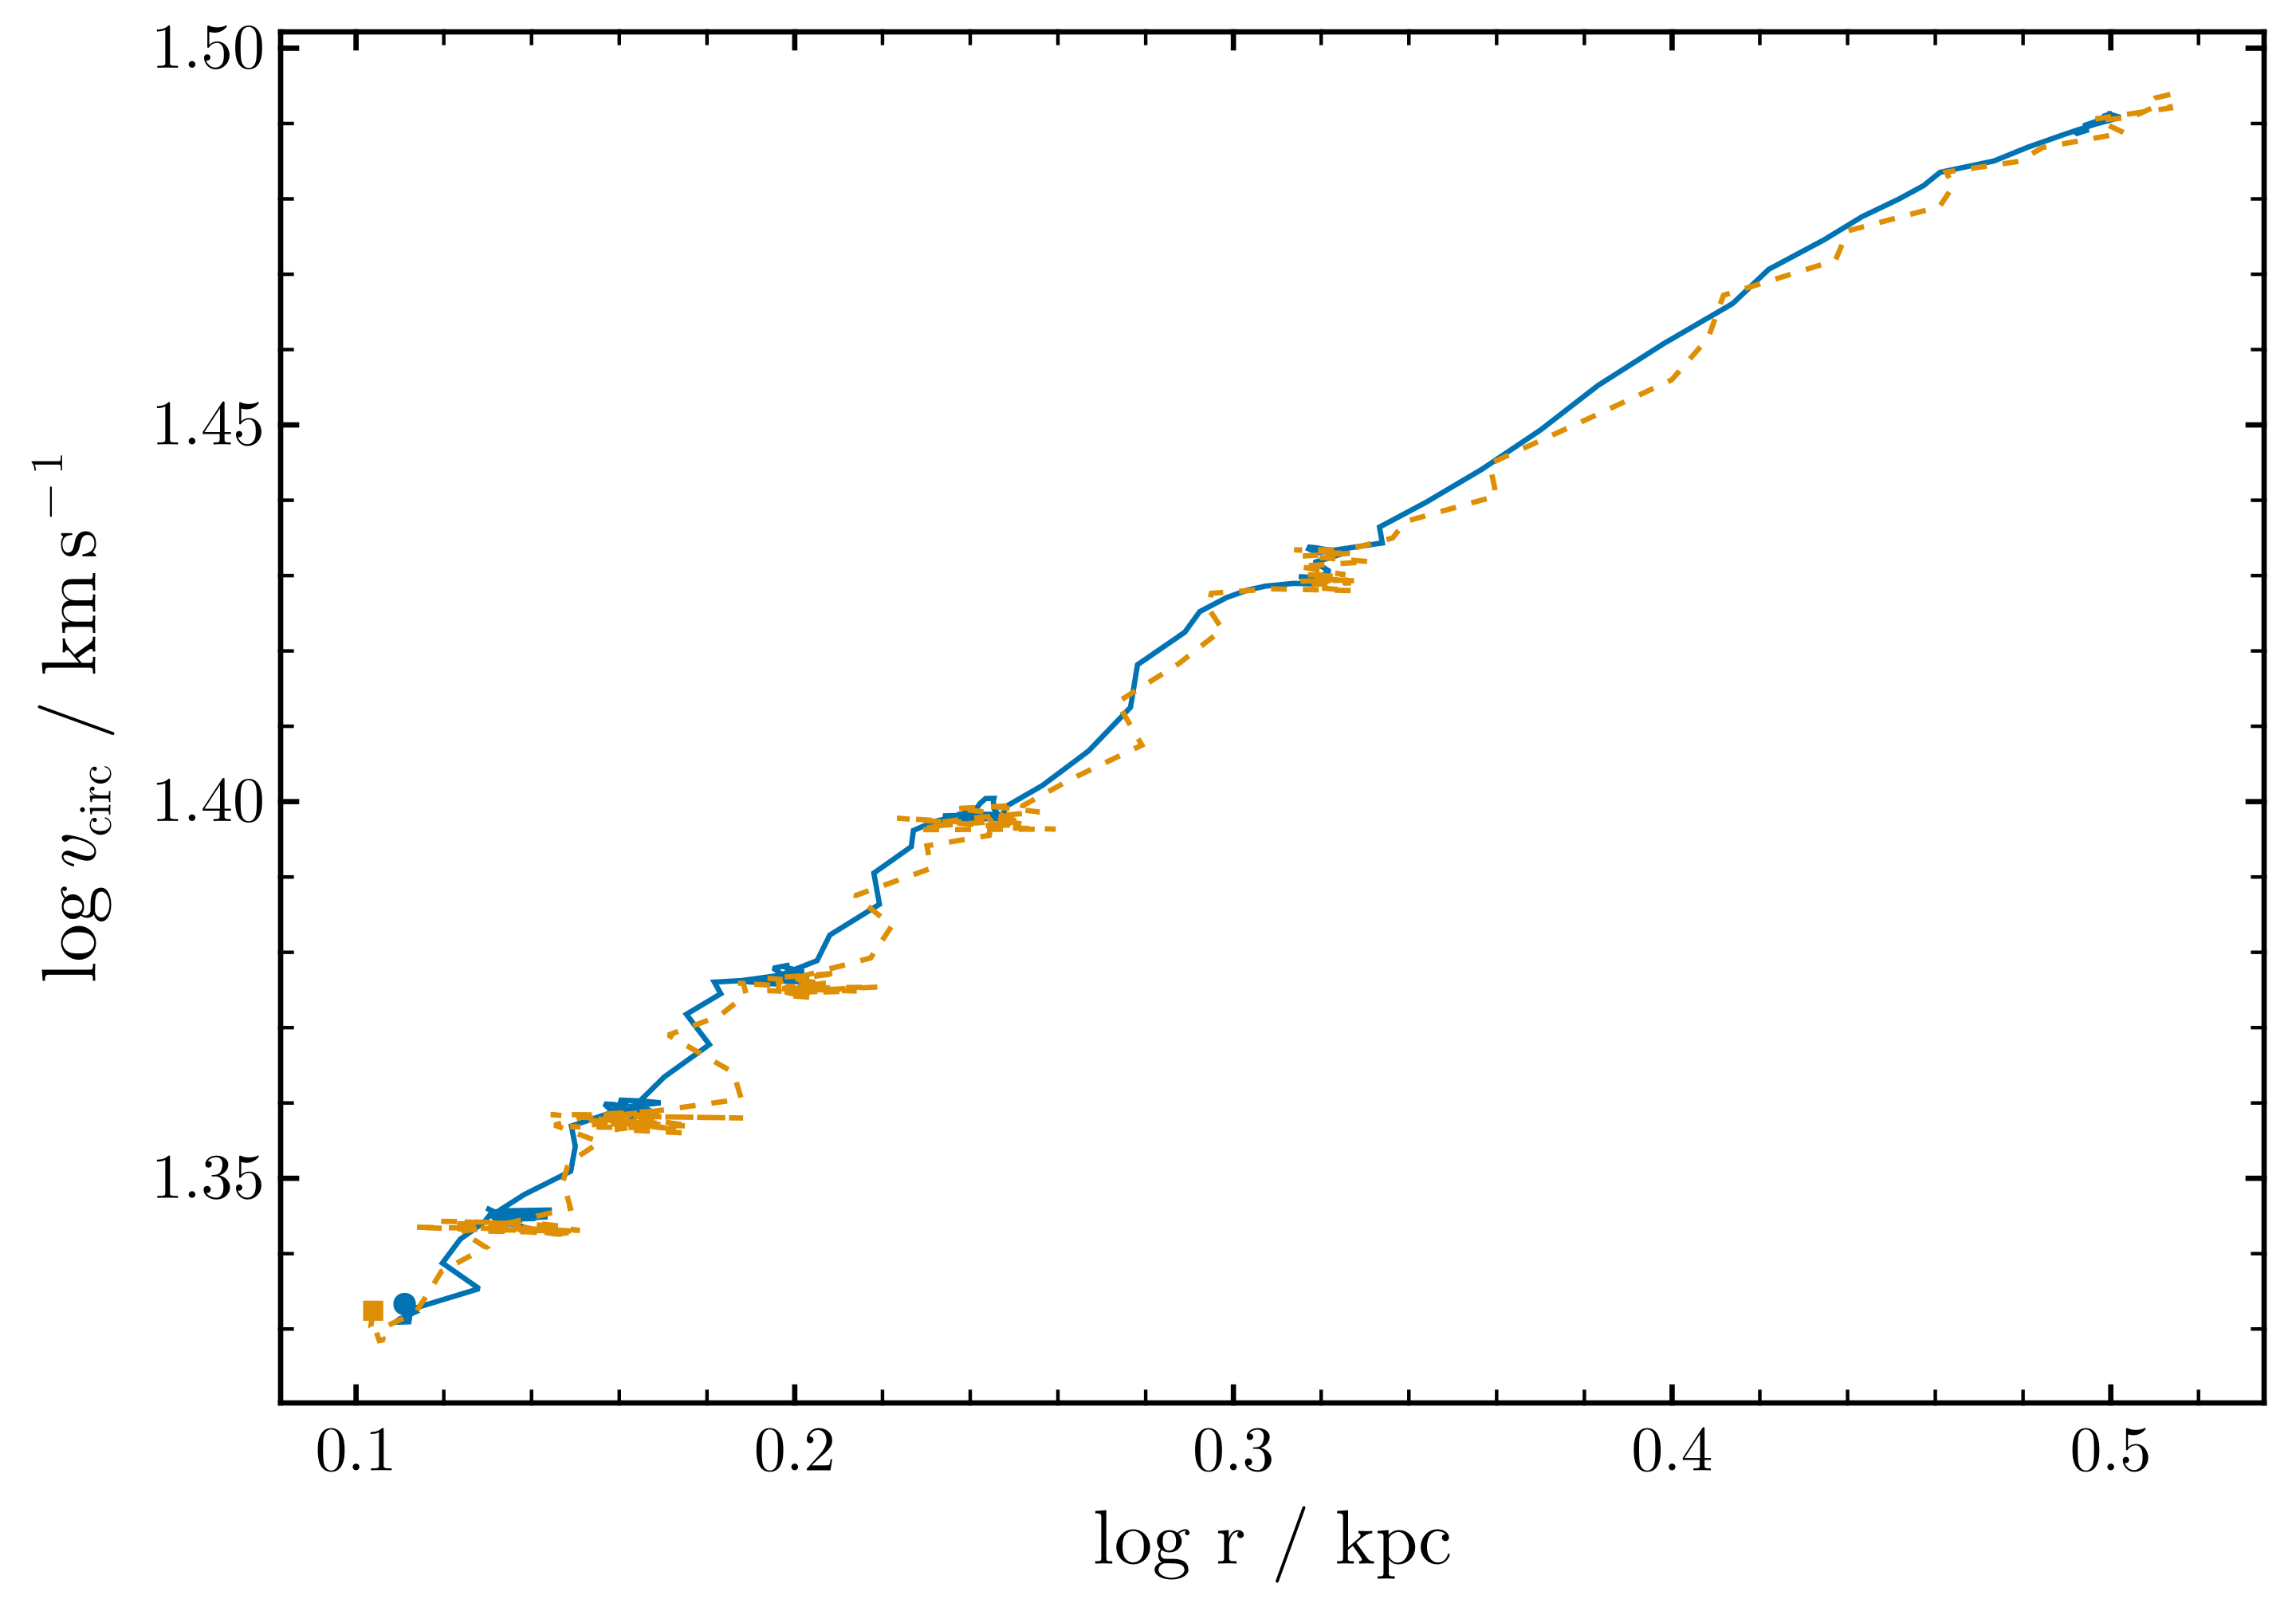

In [45]:
fig = compare_vcirc(profiles, legend=false)

In [19]:
profiles = [
    "old" => load_scalars("1e7_V31_r3.2/orbit_mean"),
    "new" => load_scalars("1e6_new_v31_r3.2/orbit_mean"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened


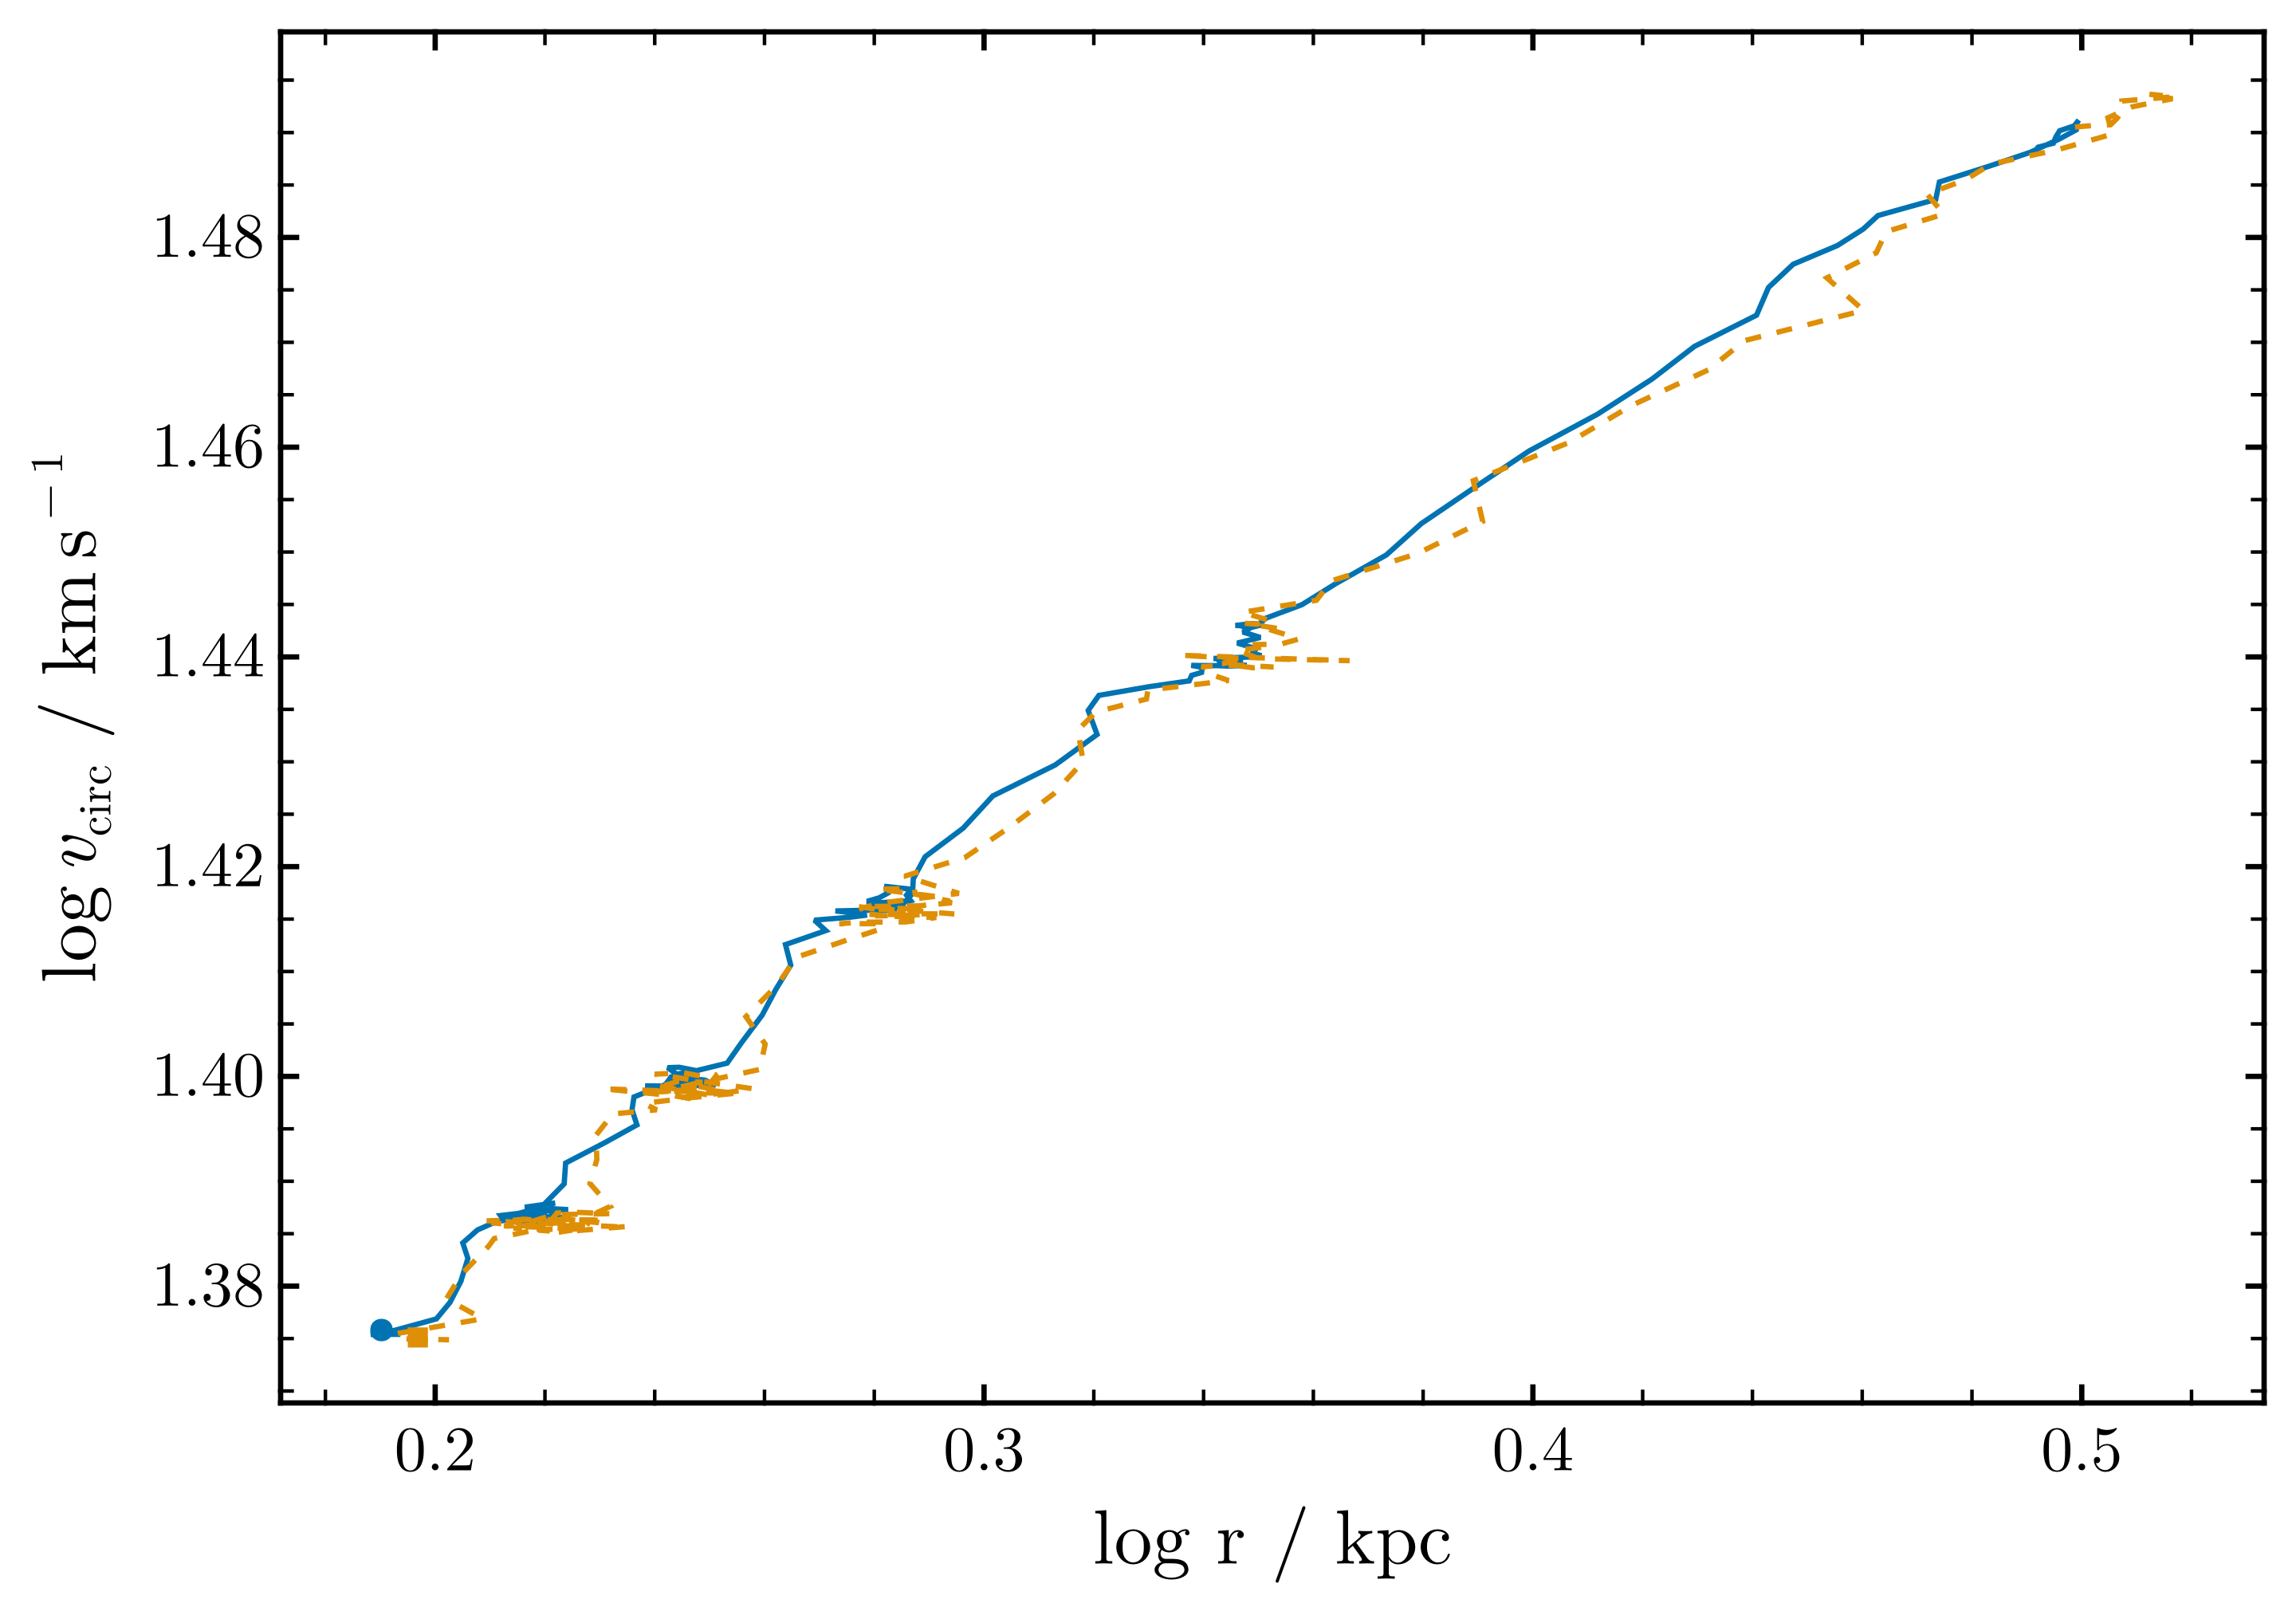

In [20]:
fig = compare_vcirc(profiles, legend=false)

In [21]:
profiles = [
    "old" => load_scalars("1e7_V31_r3.2/orbit_smallperi"),
    "new" => load_scalars("1e7_new_v31_r3.2/orbit_smallperi"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened


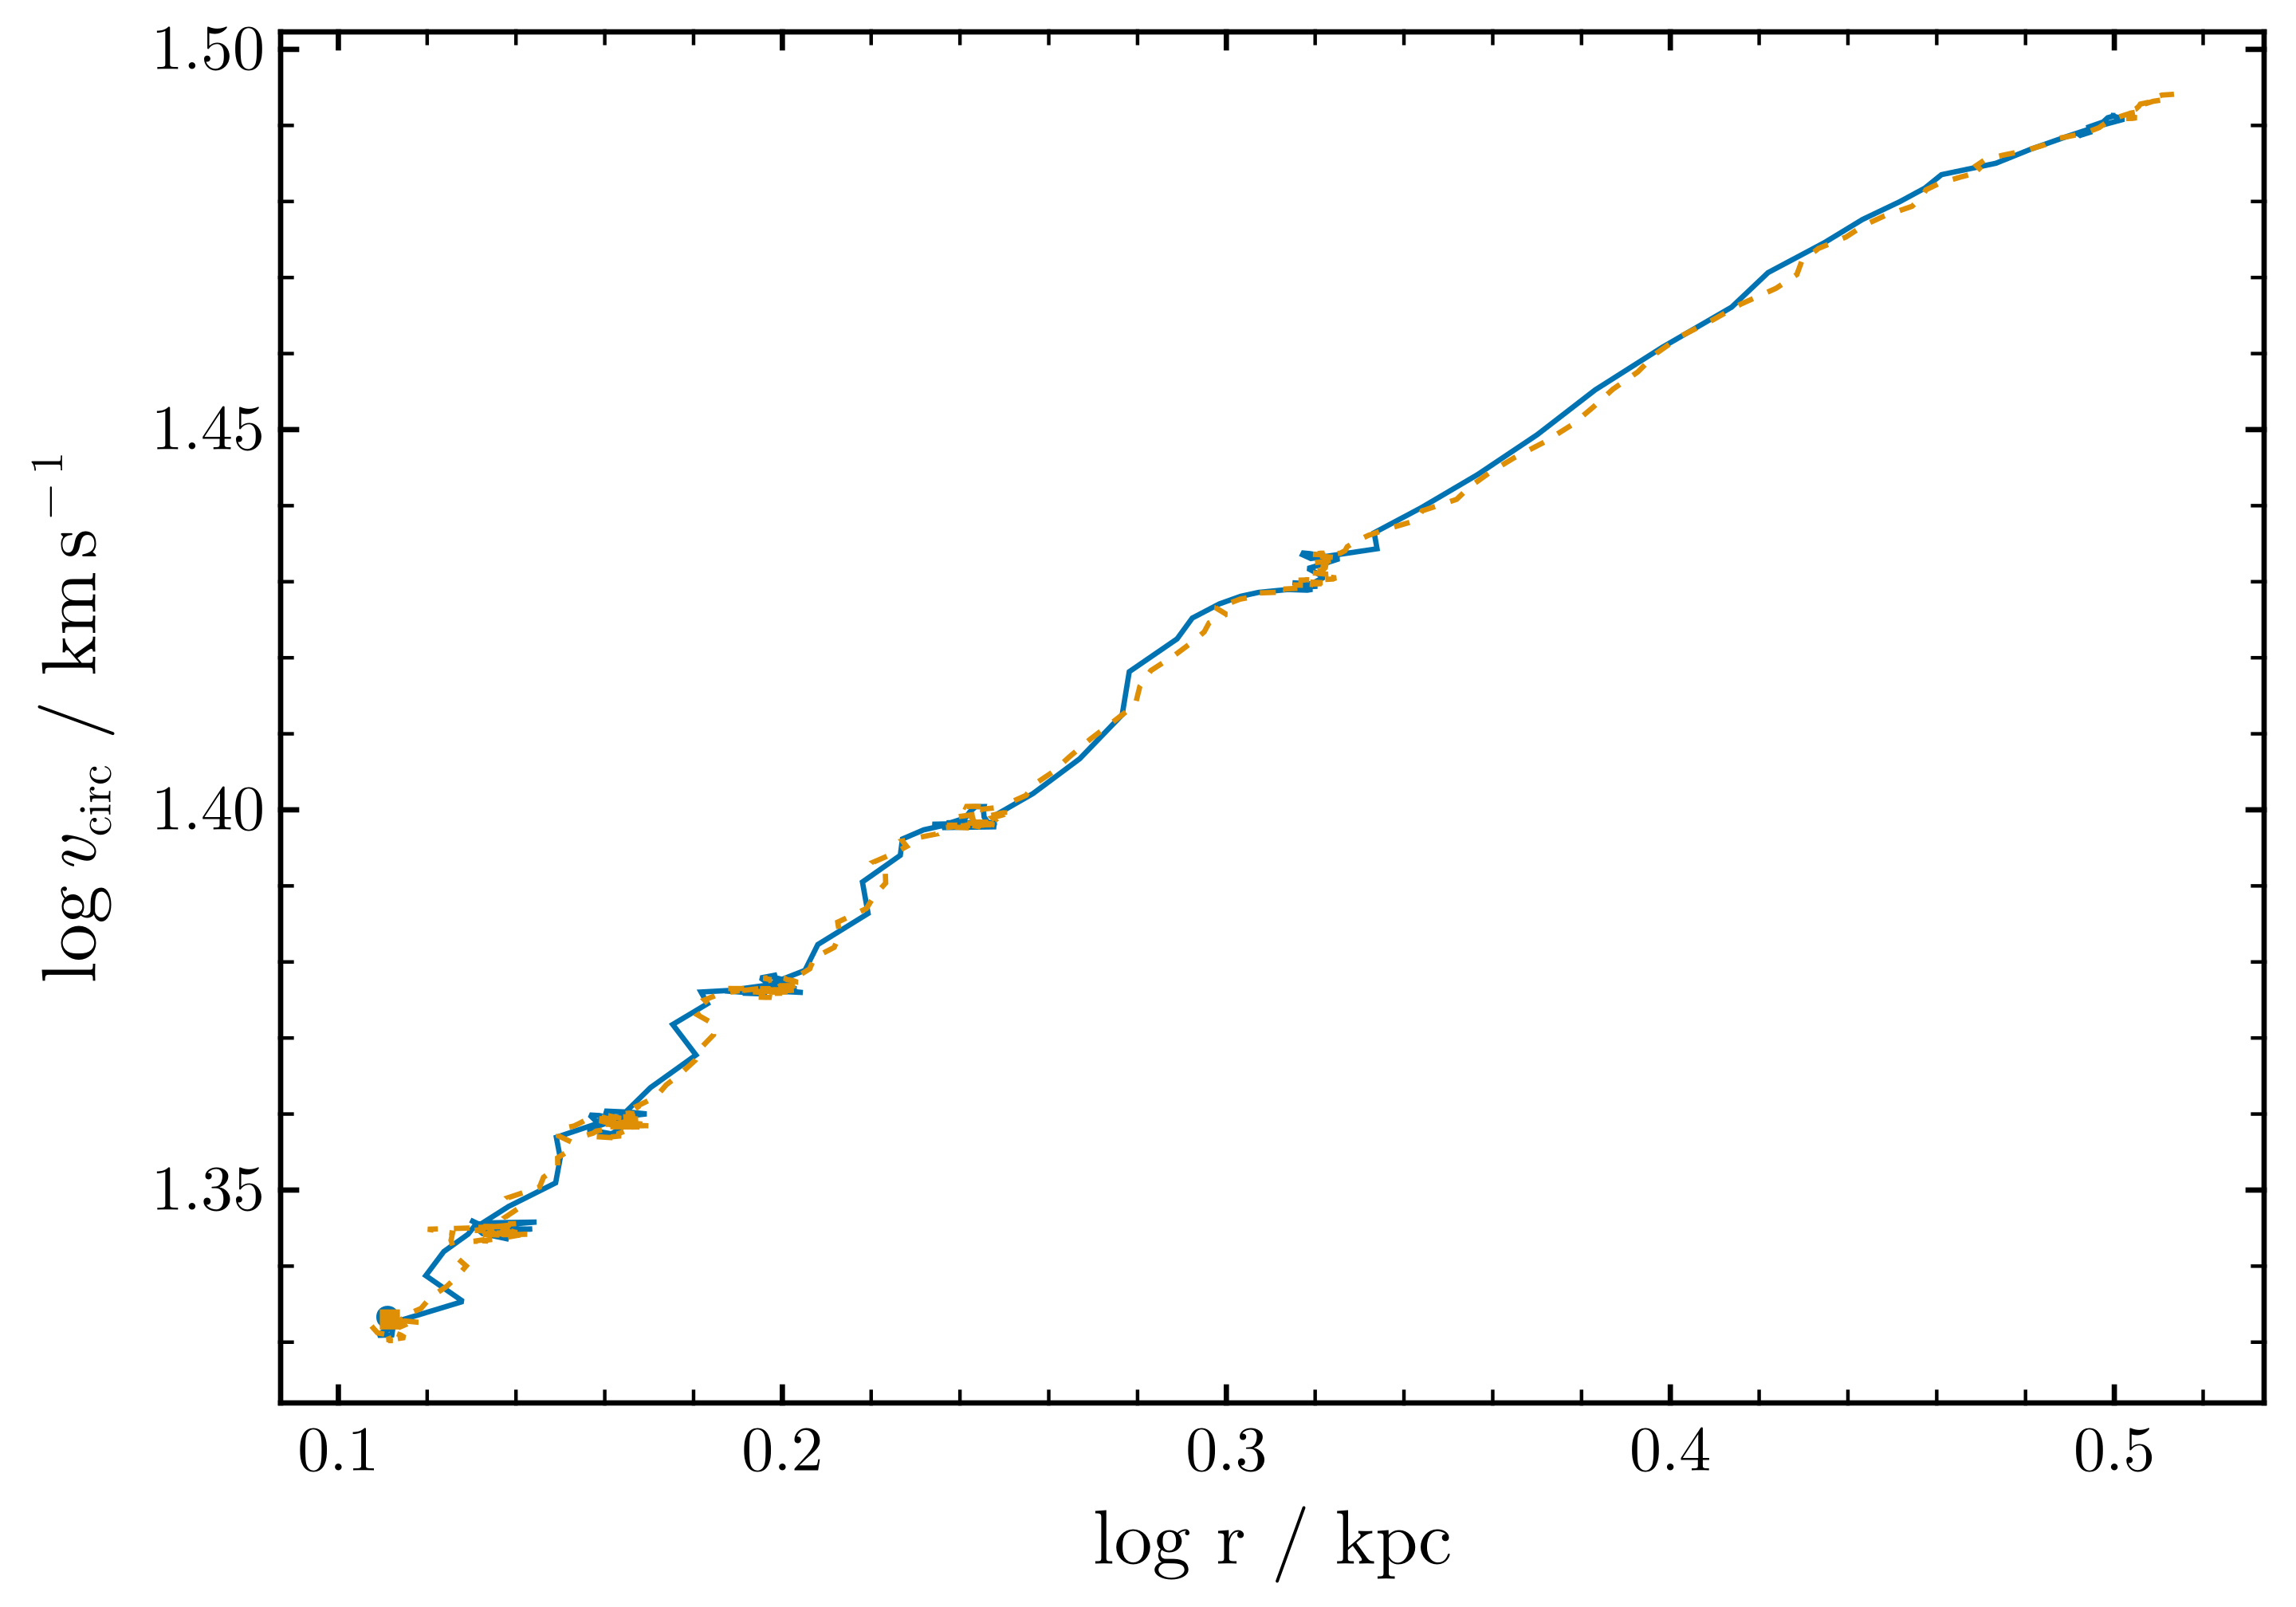

In [22]:
fig = compare_vcirc(profiles, legend=false)

In [51]:
profiles = [
    "small" => load_scalars("1e6_new_v25_r2.5/orbit_smallperi"),
    "compact" => load_scalars("1e6_new_v31_r3.2/orbit_smallperi"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened


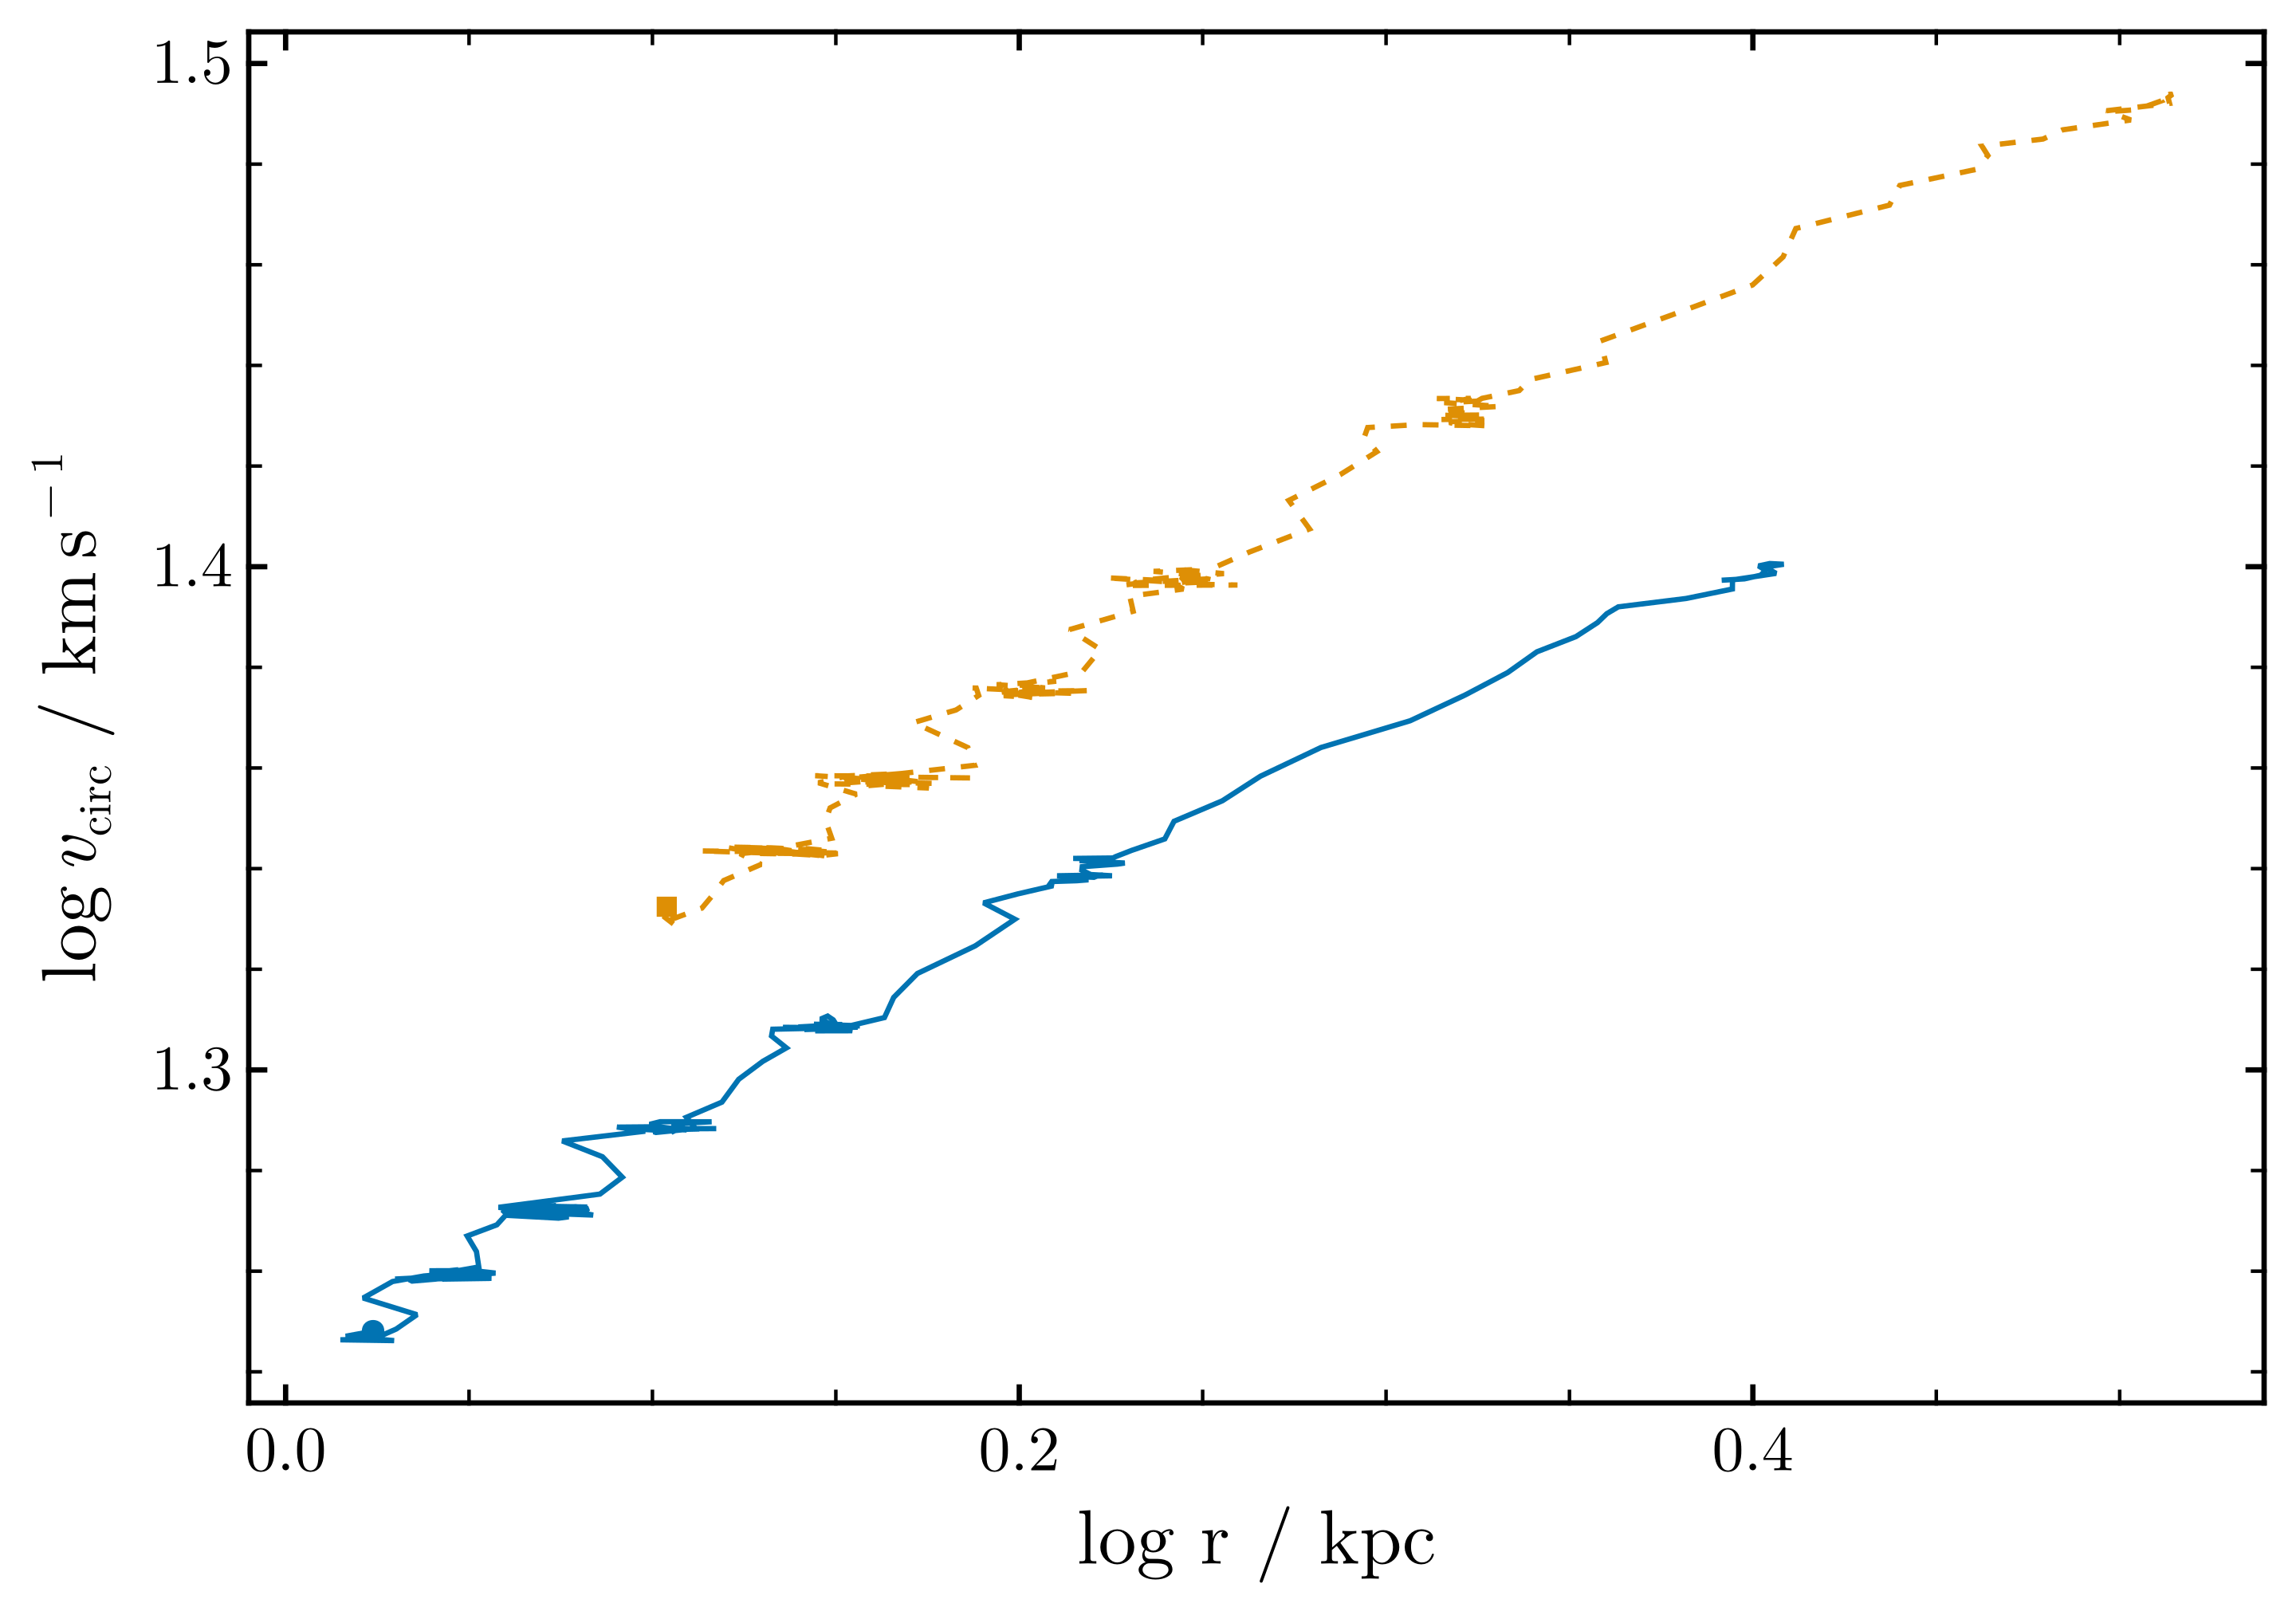

In [52]:
fig = compare_vcirc(profiles, legend=false)

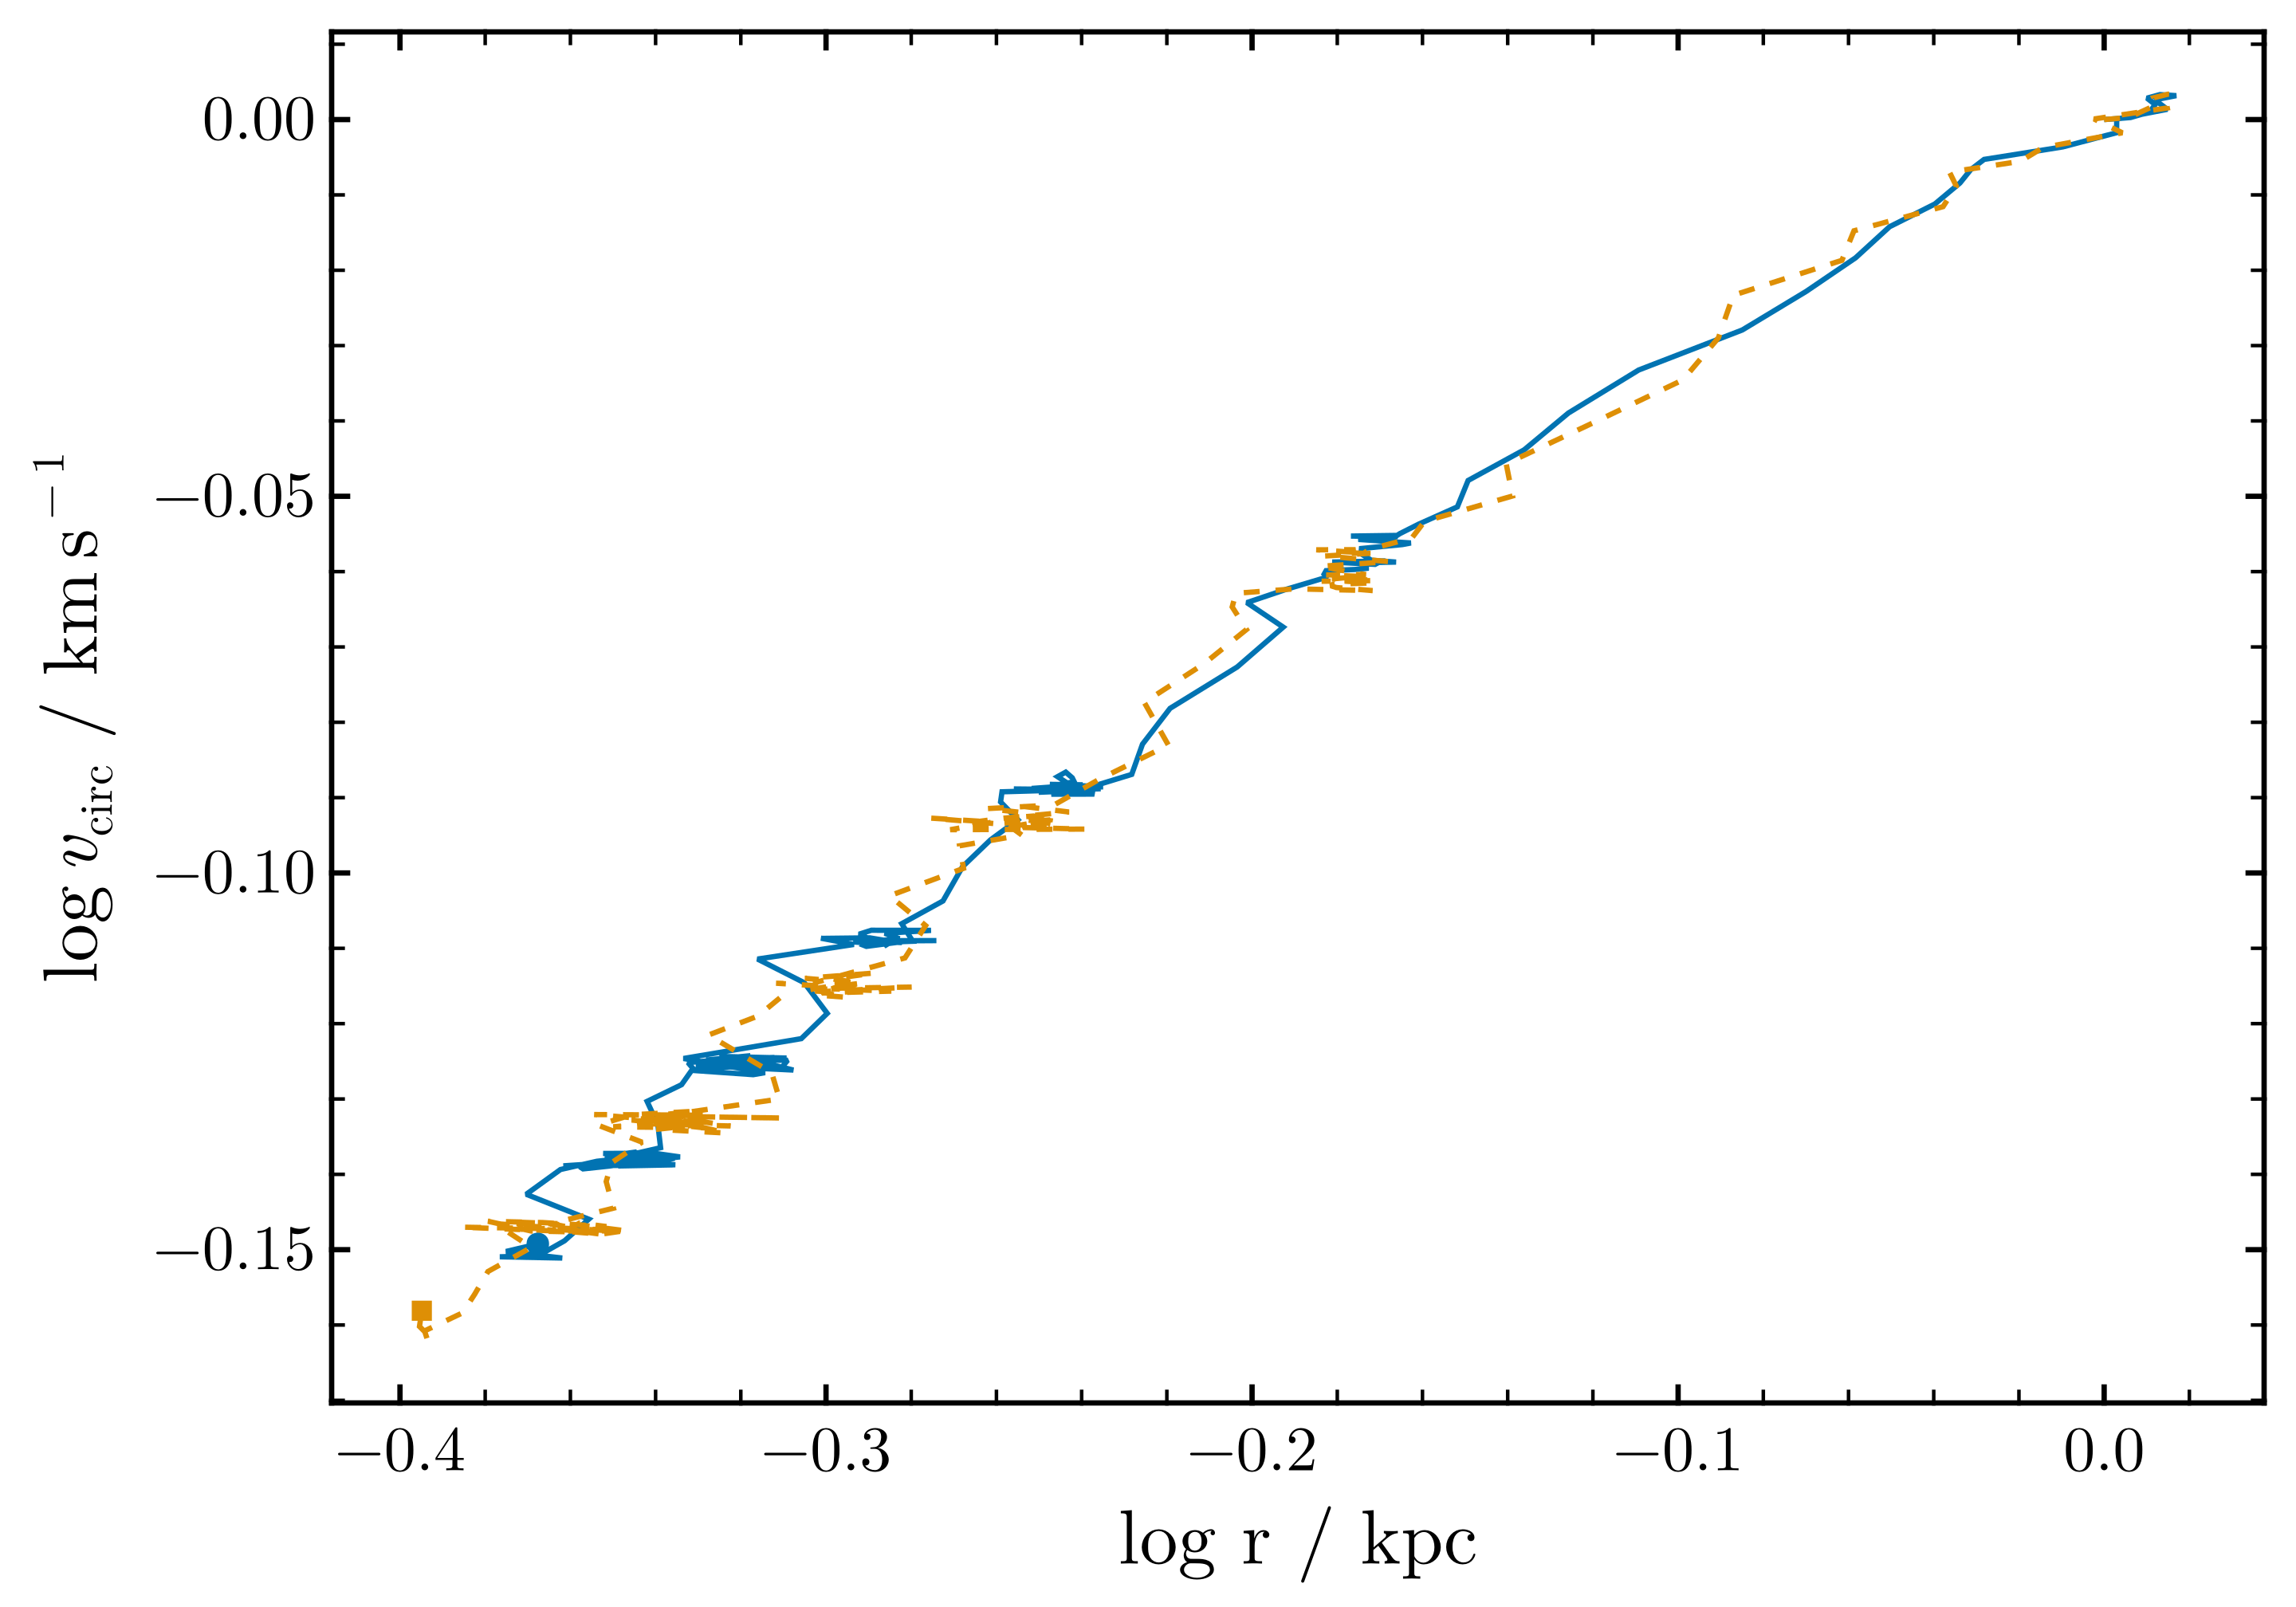

In [54]:
fig = compare_vcirc(profiles, legend=false, relative=true)

In [23]:
profiles = [
    "smallperi" => load_scalars("1e6_new_v31_r3.2/orbit_smallperi"),
    "smallperilmc" => load_scalars("1e6_new_v31_r3.2/vasiliev24_L3M11_9Gyr_smallperi"),
    "mean lmc" => load_scalars("1e6_new_v31_r3.2/vasiliev24_L3M11_9Gyr_mean"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened


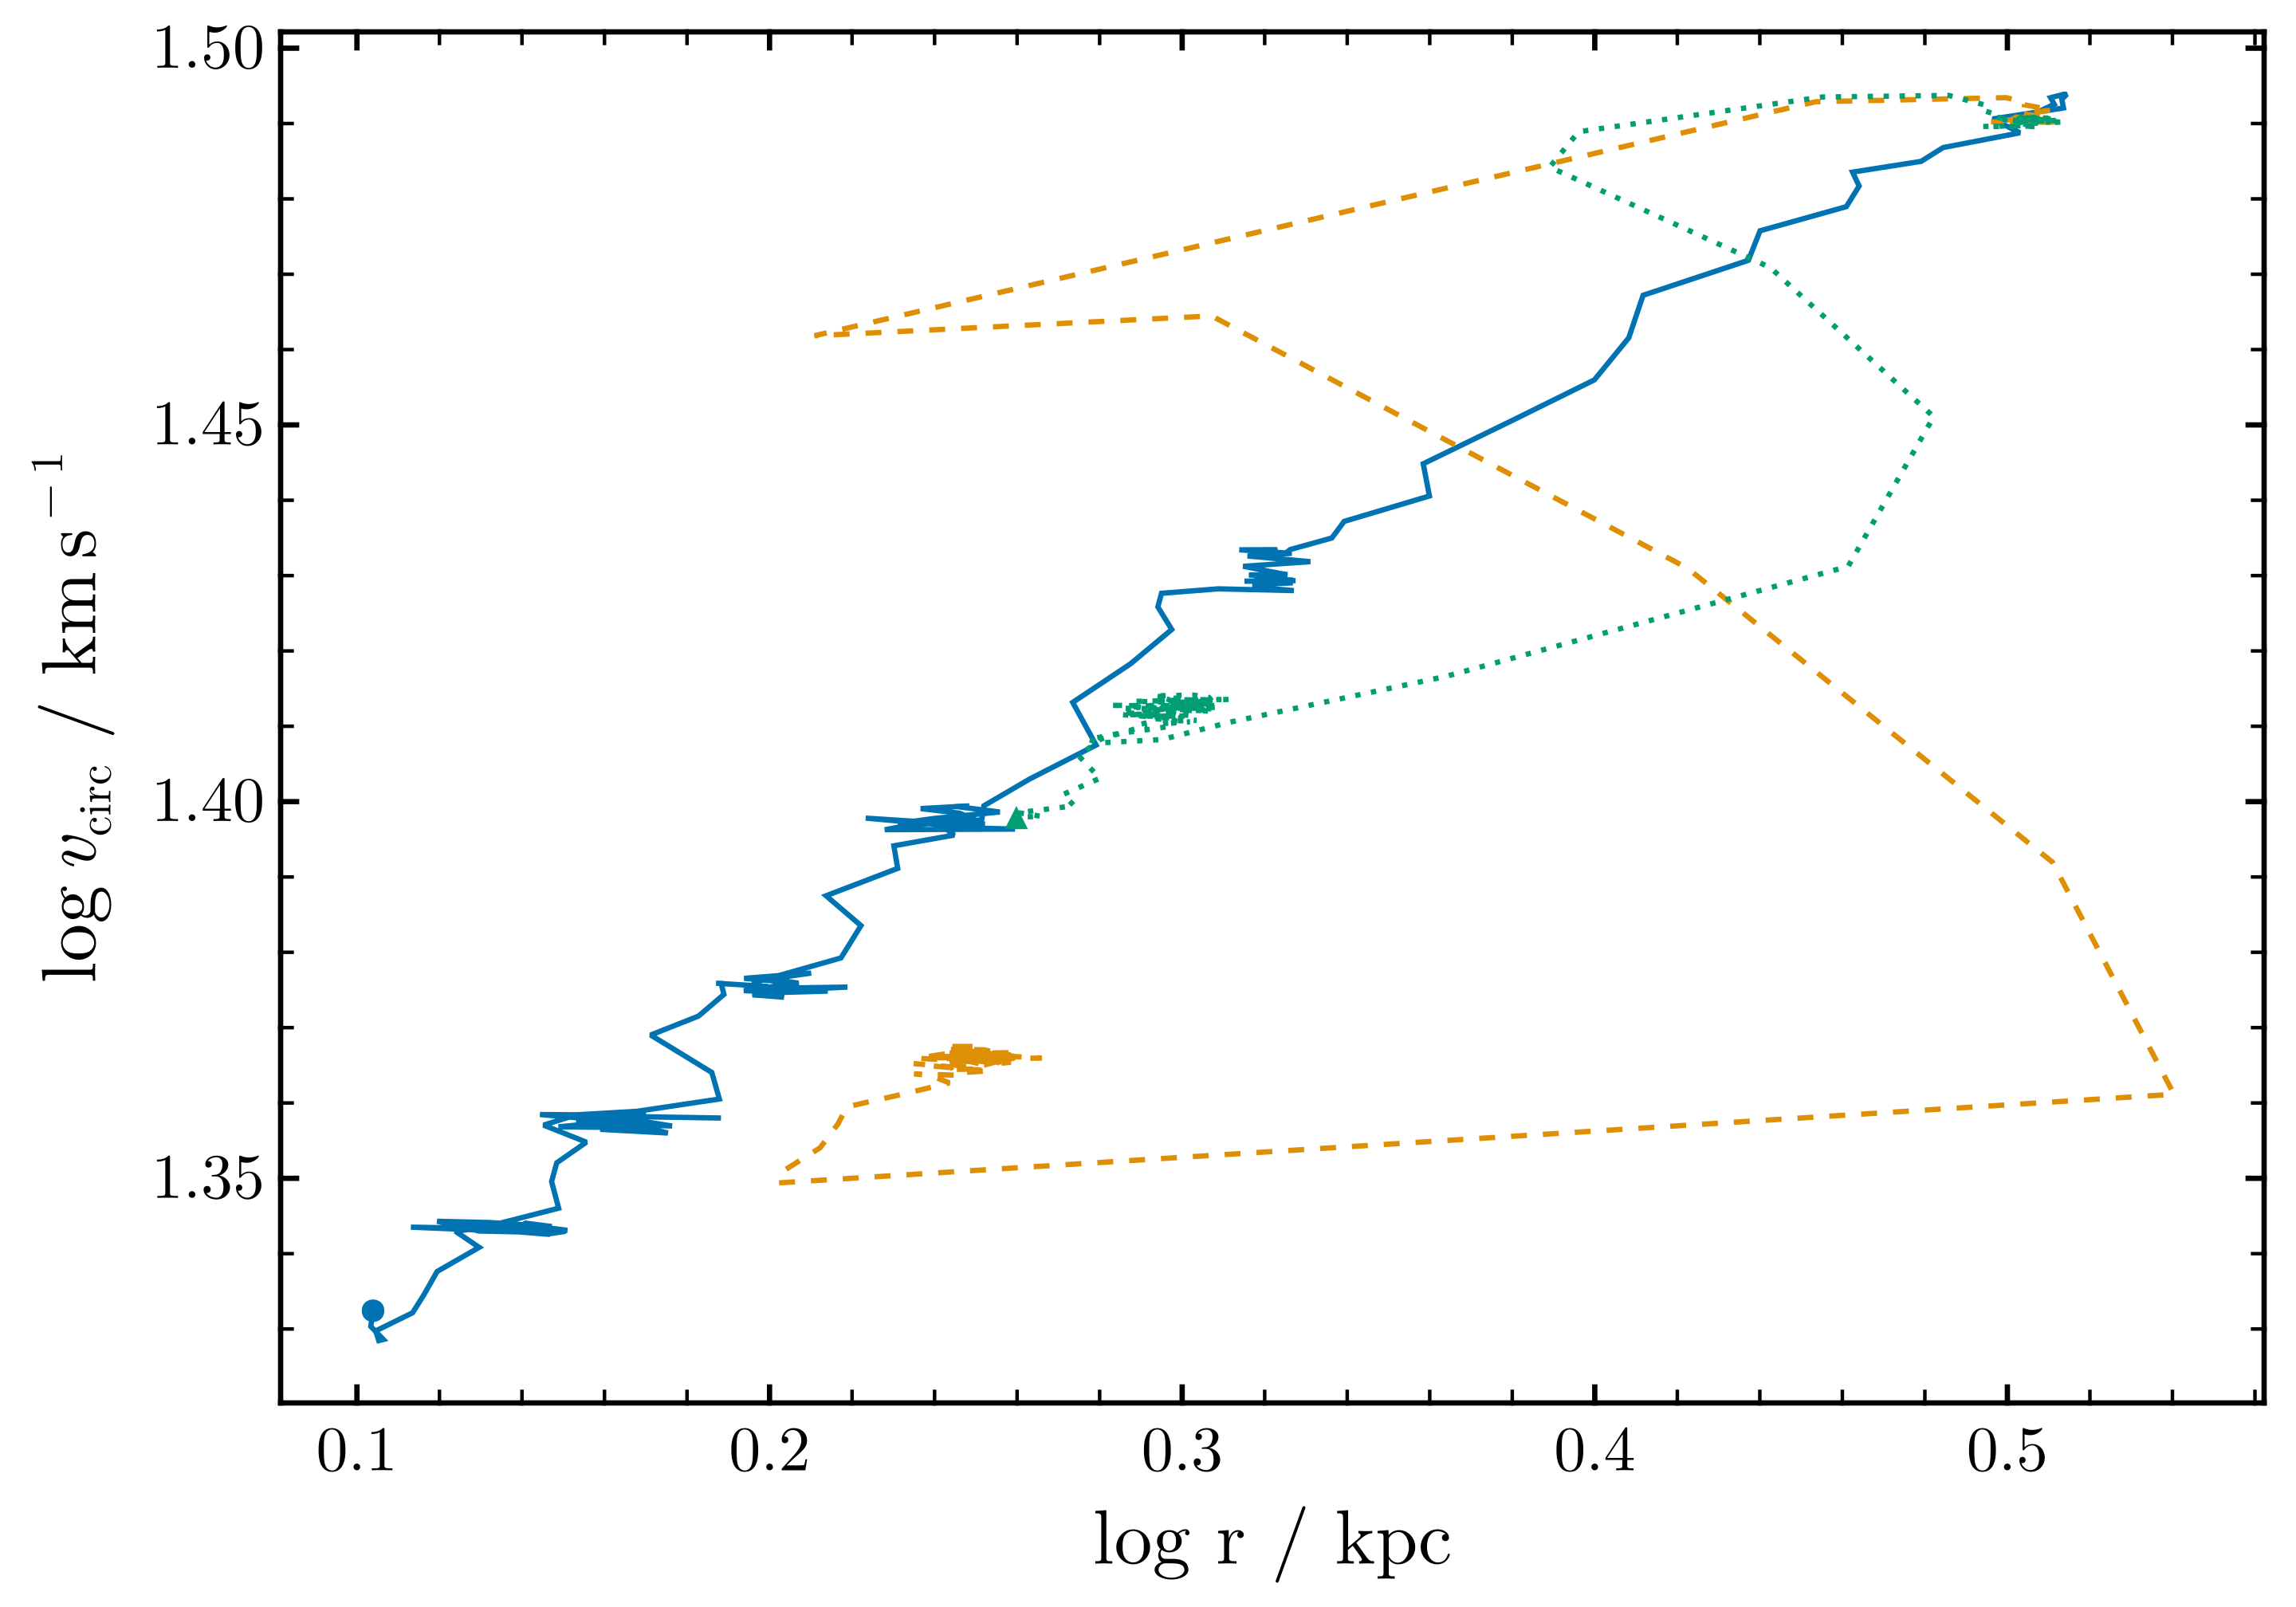

In [24]:
fig = compare_vcirc(profiles, legend=false)

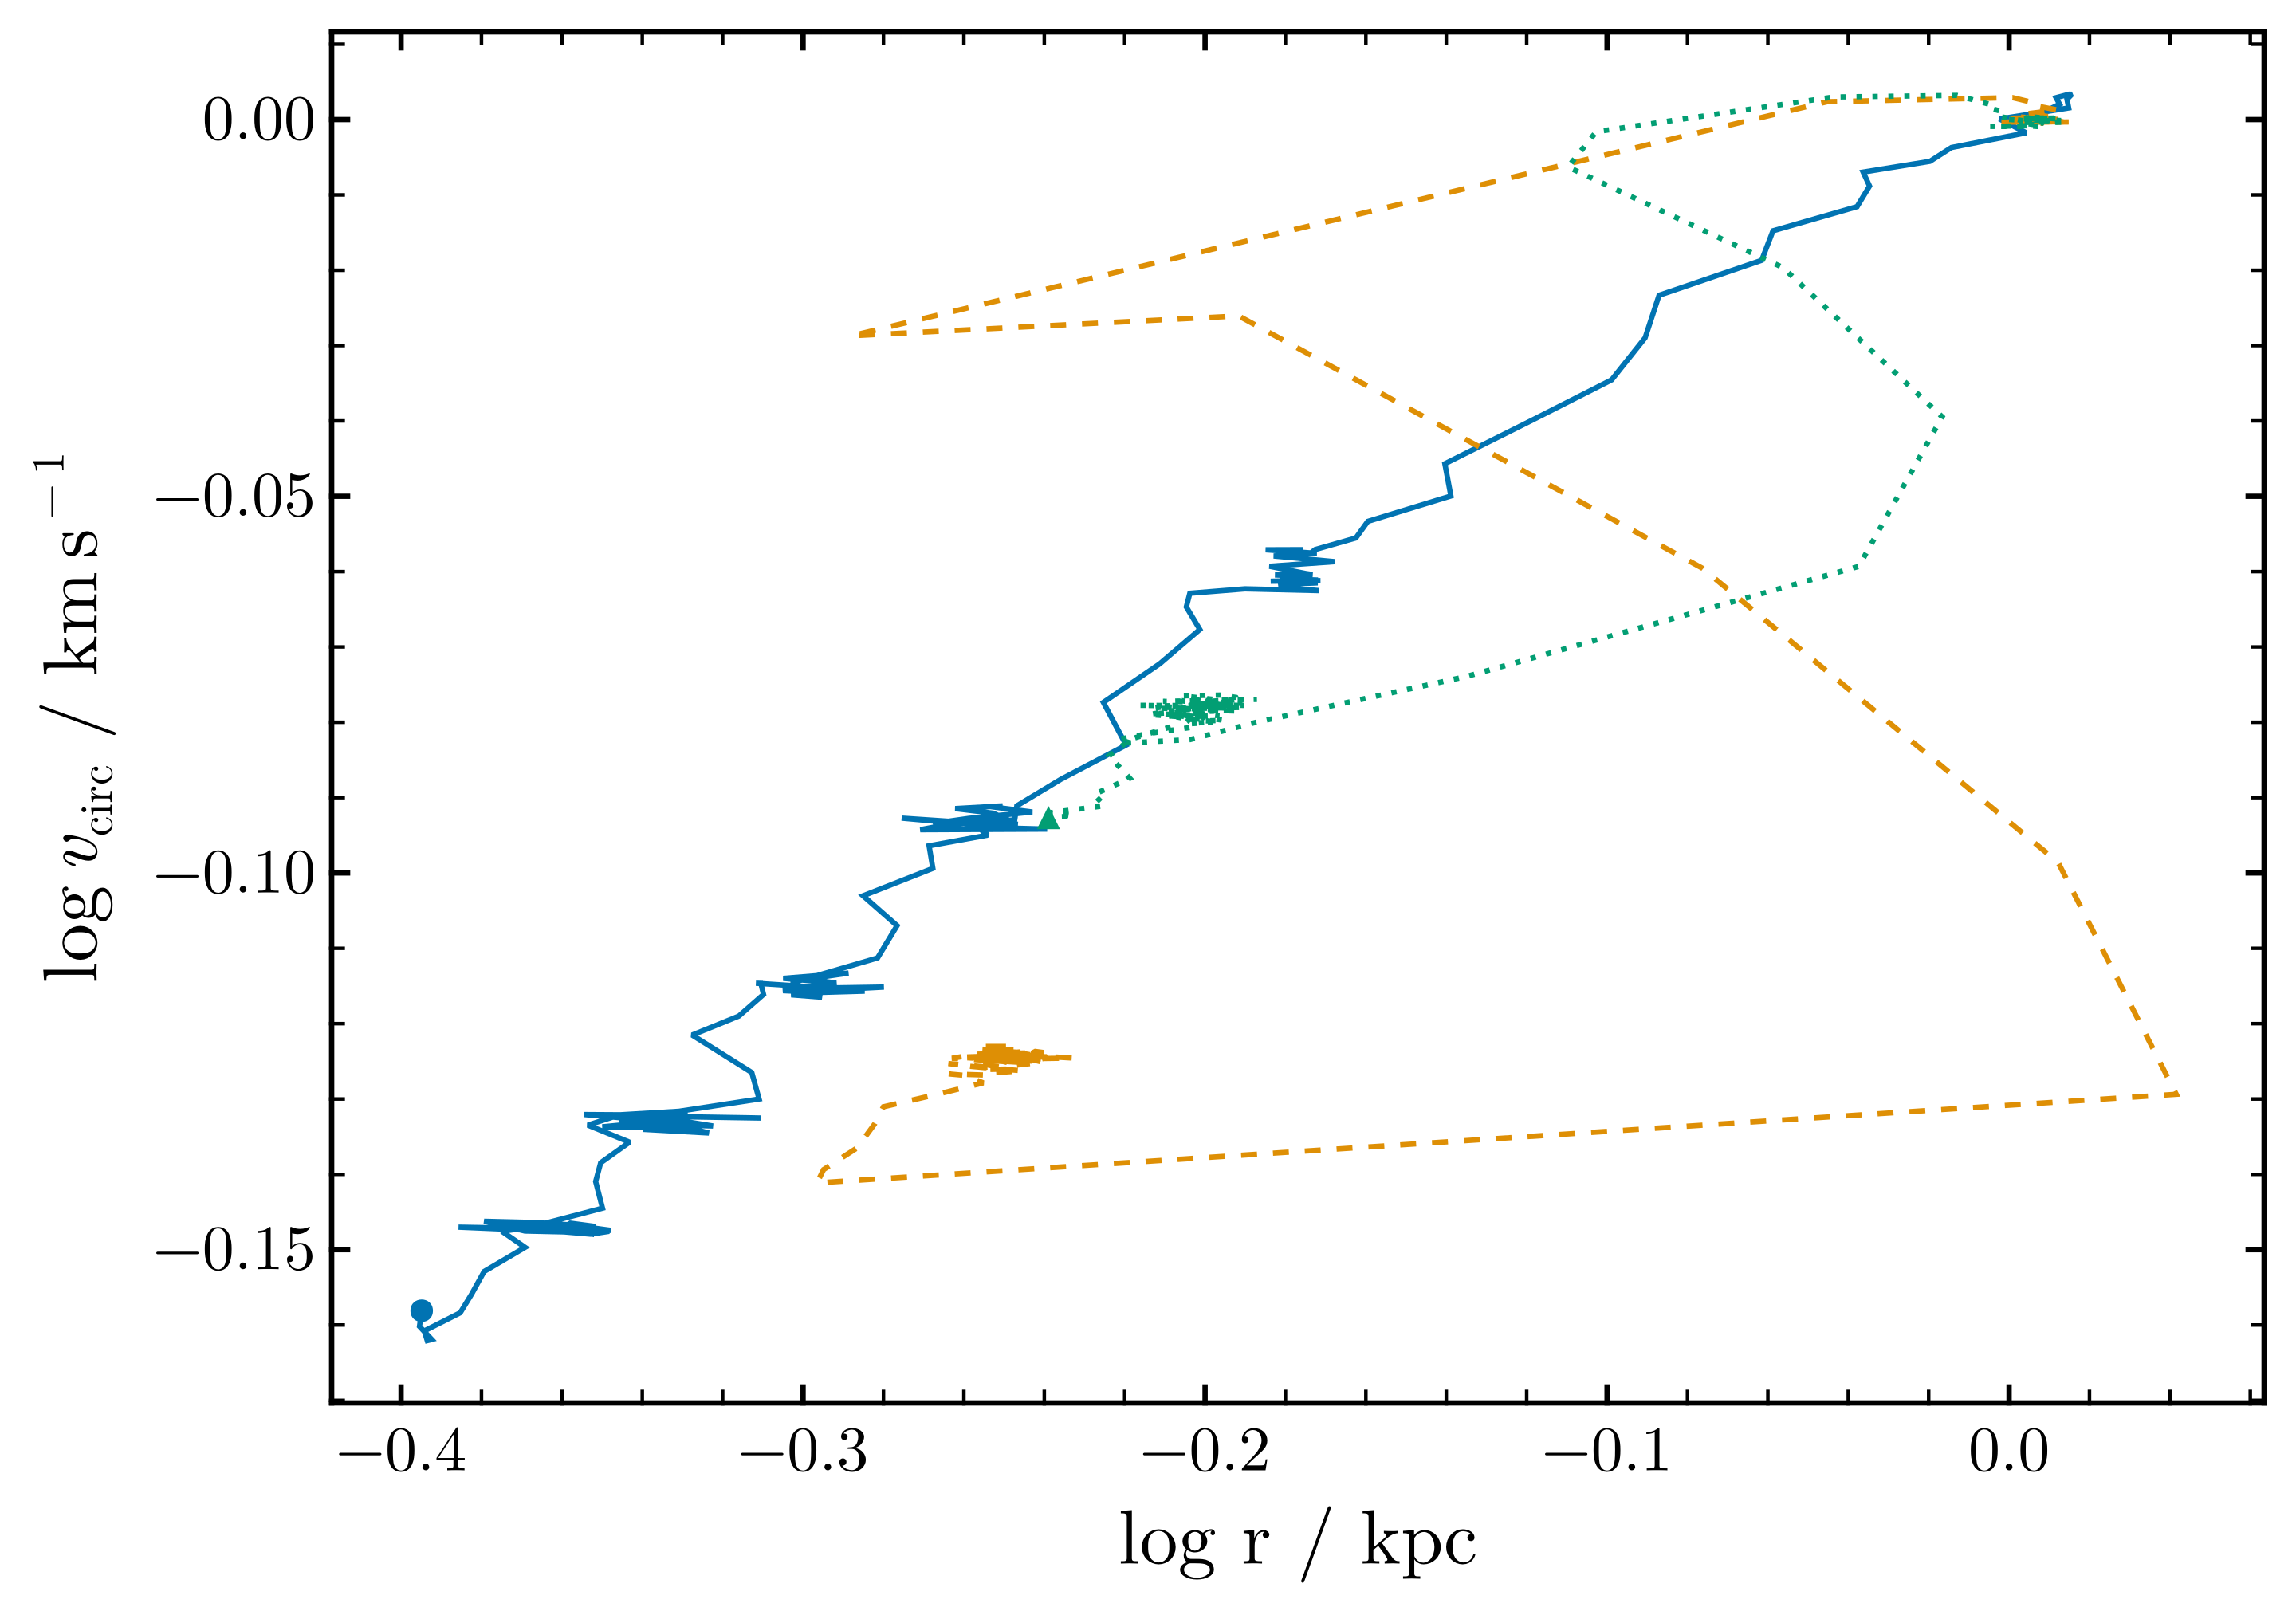

In [25]:
fig = compare_vcirc(profiles, legend=false, relative=true)

# The L3M11 smallperi model

In [23]:
readdir("./1e5_new_v31_r3.2")

24-element Vector{String}:
 "L3M11_9Gyr_smallperi.1"
 "L3M11_9Gyr_smallperi.1_R"
 "L3M11_9Gyr_smallperi.1_R_m"
 "L3M11_9Gyr_smallperi.1_phi"
 "L3M11_9Gyr_smallperi.1_phi_m"
 "L3M11_9Gyr_smallperi.1_v_R"
 "L3M11_9Gyr_smallperi.1_v_R_m"
 "L3M11_9Gyr_smallperi.1_v_phi"
 "L3M11_9Gyr_smallperi.1_v_phi_m"
 "L3M11_9Gyr_smallperi.1_v_z"
 "L3M11_9Gyr_smallperi.1_v_z_m"
 "L3M11_9Gyr_smallperi.1_z"
 "L3M11_9Gyr_smallperi.1_z_m"
 "L3M11_9Gyr_smallperi.2"
 "L3M11_9Gyr_smallperi.2.5"
 "L3M11_9Gyr_smallperi.3"
 "L3M11_9Gyr_smallperi.3b"
 "L3M11_9Gyr_smallperi.4"
 "halo-used.toml"
 "halo.toml"
 "paths.sh"
 "stars"
 "template_lmc_orbit"
 "template_orbit"

In [26]:
profiles = [
    "iter 1" => load_scalars("1e5_new_v31_r3.2/L3M11_9Gyr_smallperi.1"),
    "iter 1 (hr)" => load_scalars("1e6_new_v31_r3.2/L3M11_9Gyr_smallperi"),
    "iter 2" => load_scalars("1e5_new_v31_r3.2/L3M11_9Gyr_smallperi.2/orbit_0"),
    "iter 3" => load_scalars("1e6_new_v31_r3.2/L3M11_9Gyr_smallperi.3b"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened


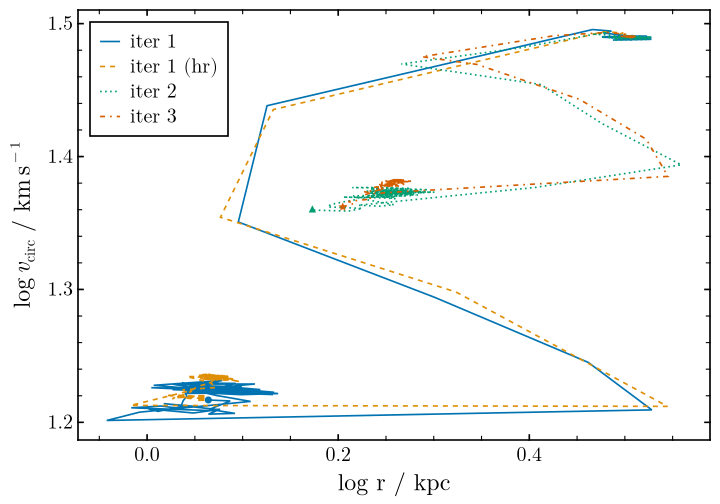

In [28]:
fig = compare_vcirc(profiles, legend=true)